## In this notebook...

We will delve into the analysis of a cleaned comments dataset extracted from the `Reddit Archive`. The data has been stored in our respective Amazon S3 buckets for convenient access.

The primary objective of this analysis is to leverage Spark NLP for in-depth exploration and insights from the text data. By utilizing advanced natural language processing techniques, we aim to uncover patterns, sentiments, and valuable information embedded within the comments.

This dataset serves as a crucial component for our ongoing project, providing the foundation for text-based analysis and contributing to a comprehensive understanding of the underlying trends and sentiments present in the Reddit discussions. Through the power of Spark NLP, we anticipate gaining meaningful insights that will enhance the overall depth and quality of our project.


## Business Goals

### 1. EDA: How do characteristics of Swift’s music change over time?

**Business goal:** Explore musical features of Swift’s music.

**Technical proposal:** To leverage Taylor Swift's unique music characteristics snapshot—a harmonious blend of high-energy tracks, danceable rhythms, and an infusion of joyful emotions, complemented by skillful storytelling and a versatile fusion of digital and acoustic elements. This powerful musical signature serves as a catalyst for cultivating a devoted and diverse fanbase, driving chart-topping hits, and solidifying Taylor Swift's position as a globally beloved artist across generations.

### 2. EDA: What are Swift-related Reddit comments like?

**Business goal:** Explore Reddit comments in the r/TaylorSwift subreddit.

**Technical proposal:** 
- **Flairs:** Clean the flair column so that similar flairs are converted to be the same, which will account for flairs that may be similar but not the same. Sum the count of flairs for each post. Show the top ten posts with the most common flairs. Create a wordcloud of the submissions’ flairs.
- **Authors:** Count the number of posts written by each unique Reddit author. Find the top ten authors with the most number of posts.
- **Scores:** Sum the score (upvotes minus downvotes) for each Reddit post. Find the top ten posts with the highest scores.

### 3. EDA: What does the emotion of the song look like?

**Business goal:** Explore and analyze the emotions expressed in the songs.

**Technical proposal:** To achieve this goal, we will utilize the Spotify dataset. Specifically, we will leverage the 'energy' and 'valence' variables to calculate emotional categories, allowing us to gain insights into the emotional content of Taylor Swift's songs.

### 4. NLP: How Do User Comments Reveal Language Patterns?

**Business goal:** Leverage bi-gram network analysis of user comments to gain a deeper understanding of language patterns and connections between word pairs.

**Technical proposal:** Conduct bi-gram network analysis on user comments extracted from the 'body' column of the dataset. Utilize data preprocessing, cleaning, and tokenization to prepare the text for analysis. Identify and extract significant bi-gram relationships using PySpark for efficient data processing, NLTK for text preprocessing, and NetworkX for network construction. Create visual representations to uncover intricate language connections.

### 5. NLP: How does the public feel about Swift’s music?

**Business goal:** Analyze public sentiment towards Swift’s music.

**Technical proposal:** Clean data by lemmatizing, removing stop words and special characters, and converting text data to a bag-of-words corpus using the NLTK library. Use the NLTK library to analyze the sentiment of each comment.

### 6. NLP: Analyzing Taylor's perception of emotion vs the Reddit community

**Business goal:** Generate sentiment for each album using the Spotify dataset and compare that to the sentiment generated from the comments related to posts of the same album.

**Technical proposal:** Use the Flairs dataset to group by and concatenate every comment for each album. Use Spark NLP for sentiment analysis. Merge this dataset with the external dataset (Spotify) using album names. Before merging, calculate the sentiment of each album in the Spotify dataset. Compare these two sentiments for further analysis.

### 7. NLP: How Can Cyberbullying in Taylor Swift's Online Community be Addressed to Foster a Safer and More Respectful Environment?

**Business goal:** Determine whether or not a comment constitutes cyberbullying to better understand public discourse around Taylor Swift.

**Technical proposal:** Implement the Spark NLP cyberbullying classifier to identify texts in the categories of Racism, Sexism, or Neutral.

### 8. ML: Predict danceability given album release year

**Business goal:** Predict danceability given album release year to better understand trends in Taylor Swift’s music over the years.

**Technical proposal:** Use linear regression to predict danceability.

### 9. ML: Predict engagement given submission

**Business goal:** Enhance user engagement in r/TaylorSwift by predicting the number of comments per submission.

**Technical proposal:** Process data, split data into training and testing sets, select and train regression models, evaluate the model's performance with metrics like MAE, MSE, and R^2, assess feature importance, interpret and visualize results, deploy the model for real-time predictions, and establish a feedback loop for continuous data collection and model retraining.

### 10. ML: Predict song popularity

**Business goal:** Focus on Taylor Swift's music, establish a threshold based on Spotify streaming counts, integrate external and Reddit data, extract features, label songs, train a classification model, evaluate performance, and enable real-time predictions with continuous model updates for relevance.

**Technical proposal:** This project entails data collection from both Spotify API and Reddit subreddits, followed by data preprocessing and feature extraction. NER models are used to identify relevant entities in comments. The data is labeled according to the established popularity threshold, and a classification model is chosen and trained using the extracted features. Model performance is evaluated using classification metrics, and feature importance analysis is conducted.

# Reason for Changing NLP Business Goals

## Previous NLP Business Goals

1. **Named Entity Recognition (NER)**

    - **Business Goal:** Identify and categorize entities mentioned in comments or submissions, such as Taylor Swift’s songs or albums.

    - **Technical Proposal:** Apply NER models, like spaCy or NLTK, to recognize and categorize named entities in the text data. Specifically, look for mentions of Taylor Swift’s songs, albums, or any other relevant entities.

2. **Topic Modeling**

    - **Business Goal:** Extract the main topic of each post.

    - **Technical Proposal:** Employ 'Latent Dirichlet Allocation' (LDA), a popular topic modeling technique, to model the topic of each post. First, clean data: lemmatize and remove stop words and special characters, and convert text data to a bag-of-words corpus using the NLTK library. Then, find topics in the data and specify the number of topics we want to find using the gensim library.

3. **Post Comment Summaries**

    - **Business Goal:** Build summaries of comments for each question/post.

    - **Technical Proposal:** Using the spaCy library, we will calculate sentence importance scores and select the most important sentences. These sentences will then be joined to form summaries of each post.

## Revised NLP Business Goals

1. **How Do User Comments Reveal Language Patterns?**

    - **Business Goal:** Leverage bi-gram network analysis of user comments to gain a deeper understanding of language patterns and connections between word pairs.

    - **Technical Proposal:** Conduct bi-gram network analysis on user comments extracted from the 'body' column of the dataset. Utilize data preprocessing, cleaning, and tokenization to prepare the text for analysis. Identify and extract significant bi-gram relationships using PySpark for efficient data processing, NLTK for text preprocessing, and NetworkX for network construction. Create visual representations to uncover intricate language connections.

2. **Analyzing Taylor's Perception of Emotion vs the Reddit Community**

    - **Business Goal:** Generate sentiment for each album using the Spotify dataset and compare that to the sentiment generated from the comments related to posts of the same album.

    - **Technical Proposal:** Use the Flairs dataset to group by and concatenate every comment for each album. Use Spark NLP for sentiment analysis. Merge this dataset with the external dataset (Spotify) using album names. Before merging, calculate the sentiment of each album in the Spotify dataset. Compare these two sentiments for further analysis.

3. **How Can Cyberbullying in Taylor Swift's Online Community be Addressed to Foster a Safer and More Respectful Environment?**

    - **Business Goal:** Determine whether or not a comment constitutes cyberbullying to better understand public discourse around Taylor Swift.

    - **Technical Proposal:** Implement the Spark NLP cyberbullying classifier to identify texts in the categories of Racism, Sexism, or Neutral.

The reason for changing our business goals was the realization that implementing Named Entity Recognition (NER) might not be necessary after formulating the Flairs dataset, which already had album names. Additionally, the complexity of developing a Latent Dirichlet Allocation (LDA) model for topic modeling led us to focus on other aspects such as cyberbullying detection and sentiment analysis.

In addition to these adjustments, we recognized the potential of leveraging bi-gram network analysis, especially given the scale of Big Data we were working with. This approach provided a solid opportunity to gain a deeper understanding of language patterns and connections between word pairs in the comments posted by Reddit users about Taylor Swift.

Despite these changes, our journey has been marked by valuable insights and knowledge acquisition. We remain enthusiastic about the ongoing learning process and the unique perspectives gained through exploring different aspects of NLP within the context of our project.


## Link to external website

Website Link: https://gu-dsan6000.github.io/fall-2023-reddit-project-team-21/

## Executive summary

Having gained a comprehensive understanding of the data from both r/taylorswift and the Spotify Taylor Swift dataset through our rigorous Exploratory Data Analysis (EDA), we are now ready to delve into the next phase which is the NLP analysis. Our achievements in this area have been pivotal in reaching our goals related to Taylor Swift’s public image and our community’s engagement. We’ve used sophisticated tools to help us better understand what users are saying and to identify the main topics in their comments. This not only gives us insights into how people feel about Taylor Swift’s music but also helps us maintain a more engaging and respectful community. Furthermore, we have conducted sentiment analysis to gauge public sentiment towards Taylor Swift’s music, providing valuable insights into how the public feels about her work. 

Additionally, our analysis has extended to comparing Taylor’s emotional perception in her albums with the sentiment expressed by the Reddit community, allowing us to uncover intriguing patterns and trends. In addressing the issue of cyberbullying, our implementation of the Spark NLP cyberbullying classifier has enabled us to identify and categorize texts into relevant categories such as racism, sexism, or neutral content. This not only aids in understanding public discourse around Taylor Swift but also contributes to fostering a safer and more respectful online environment. Our NLP accomplishments have paved the way for a deeper understanding of Taylor Swift’s impact on her audience and the dynamics of online discussions related to her music. These insights will guide us in making data-driven decisions to enhance user engagement and ensure a more positive online experience for all members of our community.

Now, let’s take a closer look at the NLP models, their implementation, and the process of discovering and developing them.

## Start Spark Session

In [1]:
spark

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 61, 6, Finished, Available)

## Install additional packages

The next cell installs the John Snow Labs package on the cluster.

In [2]:
%%configure -f \
{"conf": {"spark.jars.packages": "com.johnsnowlabs.nlp:spark-nlp_2.12:5.1.2"}}

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, -1, Finished, Available)

Unrecognized options: 

In addition, we need the Python package on the Spark driver.

In [3]:
!pip install spark-nlp

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 6, Finished, Available)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.7/540.7 kB 23.0 MB/s eta 0:00:00


In [4]:
!pip install azureml.fsspec

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 7, Finished, Available)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 61.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 73.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: azureml-dataprep-rslex
    Found existing installation: azureml-dataprep-rslex 2.11.4
    Uninstalling azureml-dataprep-rslex-2.11.4:
      Successfully uninstalled azureml-dataprep-rslex-2.11.4
  Attempting uninstall: msal-extensions
    Found existing installation: msal-extensions 1.0.0
    Uninstalling msal-extensions-1.0.0:
      Successfully uninstalled msal-extensions-1.0.0
  Attempting uninstall: azureml-dataprep
    Found existing installation: azureml-dataprep 4.5.7
    Uninstalling azureml-dataprep-4.5.7:
      Successfully uninstalled azureml-dataprep-4.5.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
azureml-dataset-runtime 1.47.0 requires azur

In [5]:
!pip install altair

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 8, Finished, Available)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 996.9/996.9 kB 31.2 MB/s eta 0:00:00


In [6]:
!pip install wordcloud

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 9, Finished, Available)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 19.2 MB/s eta 0:00:00


## Load required libraries

In [8]:
# General
import pandas as pd
import numpy as np
import json
import io

# Visualizations
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import altair as alt
import wordcloud


# Pyspark
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark.ml.feature import HashingTF, IDF, Tokenizer

# Spark NLP
import sparknlp
from sparknlp.annotator import *
from sparknlp.base import *
from sparknlp.pretrained import PretrainedPipeline
from azure.storage.blob import BlobServiceClient
from azureml.fsspec import AzureMachineLearningFileSystem
from sparknlp.base import Finisher, DocumentAssembler


# Text pre-processing
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Word embedding
import gensim
from gensim.models import Word2Vec

import warnings
warnings.filterwarnings('ignore')

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 11, Finished, Available)

In [9]:
nltk.download('stopwords')
eng_stopwords = nltk.corpus.stopwords.words('english')

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 12, Finished, Available)

[nltk_data] Downloading package stopwords to /home/trusted-service-
[nltk_data]     user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
pd.set_option('display.max_colwidth', None)

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 13, Finished, Available)

## Reading data into a Spark Dataframe

Note that we will be using the "s3a" adapter. S3A enables Hadoop to directly read and write Amazon S3 objects.

Let us read data from the s3 path where we saved the filtered data.

In [11]:
blob_path = 'azureml://datastores/workspaceblobstore/paths/cleanedComments/cleanSubset/part-*.snappy.parquet'
ts_comm_cleaned = spark.read.parquet(blob_path, header=True)

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 14, Finished, Available)

### Dataset overview

Lets take a look at the shape of the data

In [12]:
ts_count = ts_comm_cleaned.count()
print(f'Number of rows in dataset: {ts_count}')
print(f'Number of columns in dataset: {len(ts_comm_cleaned.columns)}')

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 15, Finished, Available)

Number of rows in dataset: 18370
Number of columns in dataset: 19


Lets take a look at how the data has been structured

In [13]:
# Use the printSchema method to print the Spark DataFrame schema
ts_comm_cleaned.printSchema()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 16, Finished, Available)

root
 |-- author: string (nullable = true)
 |-- author_flair_text: string (nullable = true)
 |-- body: string (nullable = true)
 |-- can_gild: boolean (nullable = true)
 |-- controversiality: long (nullable = true)
 |-- created_utc: timestamp (nullable = true)
 |-- edited: string (nullable = true)
 |-- gilded: long (nullable = true)
 |-- id: string (nullable = true)
 |-- is_submitter: boolean (nullable = true)
 |-- link_id: string (nullable = true)
 |-- parent_id: string (nullable = true)
 |-- permalink: string (nullable = true)
 |-- retrieved_on: timestamp (nullable = true)
 |-- score: long (nullable = true)
 |-- stickied: boolean (nullable = true)
 |-- subreddit: string (nullable = true)
 |-- subreddit_id: string (nullable = true)
 |-- length_body: integer (nullable = true)



Lets take a look at the data by selecting a subset of columns and using .show() method for displaying.

In [14]:
# display a subset of columns
ts_comm_cleaned.select("subreddit", "author", "body", "parent_id", "link_id", "id", "created_utc").show()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 17, Finished, Available)

+-----------+-------------------+--------------------+----------+---------+-------+-------------------+
|  subreddit|             author|                body| parent_id|  link_id|     id|        created_utc|
+-----------+-------------------+--------------------+----------+---------+-------+-------------------+
|TaylorSwift|          Bluemelli|It's about trauma...| t3_yqb4zu|t3_yqb4zu|ivp6qbc|2022-11-09 16:30:07|
|TaylorSwift|              kmh70|Tickets are alrea...| t3_yw1pp8|t3_yw1pp8|iwh7zl0|2022-11-15 16:55:53|
|TaylorSwift|        AceCombat04|Mine is doing the...|t1_iwh7sj7|t3_yw1pp8|iwh80s7|2022-11-15 16:56:06|
|TaylorSwift|         elephant05|               Same!|t1_iwh7zpe|t3_yjjejv|iwh82ao|2022-11-15 16:56:23|
|TaylorSwift|          2012amica|I signed up with ...|t1_iwgls91|t3_yjjejv|iwh82y6|2022-11-15 16:56:30|
|TaylorSwift|  MajesticCoconut99|Lol this presale ...|t1_iwh3vri|t3_yjjejv|iwh84ad|2022-11-15 16:56:45|
|TaylorSwift|         PolkaDotMe|An issue all Amer...|t1_iwh2lv4

## Data Text Checks

### Most common words

First we will take a look at the most common words in all the comments of our dataset.

In [15]:
word_count = ts_comm_cleaned.withColumn('word', F.explode(F.split(F.col('body'), ' ')))\
    .groupBy('word')\
    .count()\
    .sort('count', ascending=False)
word_count.printSchema()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 18, Finished, Available)

root
 |-- word: string (nullable = false)
 |-- count: long (nullable = false)



In [16]:
word_count.show()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 19, Finished, Available)

+----+-----+
|word|count|
+----+-----+
| the|18009|
|   I|14042|
|  to|12096|
| and|11208|
|   a|10341|
|  of| 8374|
|  it| 6607|
|  is| 6408|
|  in| 5791|
|that| 5488|
| for| 5137|
| was| 4586|
| you| 4336|
|this| 4277|
| but| 4144|
|  be| 3824|
|  on| 3811|
|  so| 3668|
| her| 3481|
|  my| 3423|
+----+-----+
only showing top 20 rows



The table above displays the top 20 most common words in the comments dataset before any text data cleaning. These frequencies provide insights into the most commonly used words in the original comments data.

### Distribution of text lengths

Lets take a look at the 'length_body' column to examine the length of each comment.

In [17]:
comment_count_df = ts_comm_cleaned.groupBy("length_body").agg(F.count("length_body").alias('comment_count')).toPandas()
comment_count_df

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 20, Finished, Available)

,length_body,comment_count
0,148,38
1,463,2
2,243,15
3,1395,1
4,623,3
...,...,...
1017,1063,1
1018,1278,1
1019,2002,1
1020,1174,1


We can examine more about each comment length count by plotting the dataframe above.

In [39]:
# Define the bin edges
bin_edges = [i * 1000 for i in range(9)]  

# Calculate the histogram
hist, bin_edges = np.histogram(comment_count_df['length_body'], bins=bin_edges)

# Create a Plotly figure
fig = px.histogram(comment_count_df, x='length_body', nbins=len(bin_edges), opacity=0.7, labels={'length_body': 'Length of Body'})

# Add a border to the bars
fig.update_traces(marker=dict(line=dict(color='black', width=1), color='#D8BFD8'))

fig.update_layout(
    xaxis_title='<b>Length of Body</b>',
    yaxis_title='<b>Comments Counts</b>',
)

fig.update_layout(
    title=go.layout.Title(
        text="<b>Original Data: Character Length Distribution</b> <br><sup><b>Subreddit: TaylorSwift</b></sup>",
        xref="paper",
        x=0
    )
    )
# Set the background color to white
fig.update_layout(plot_bgcolor='white')

# Add axis lines
fig.update_xaxes(showline=True, linewidth=1, linecolor='#E8E8E8')
fig.update_yaxes(showline=True, linewidth=1, linecolor='#E8E8E8')

# Save the plot as an HTML file
fig.write_html("Users/cs2046/fall-2023-reddit-project-team-21/plots/comment_count.html")

fig.show()


StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 42, Finished, Available)

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 92, Finished, Available)

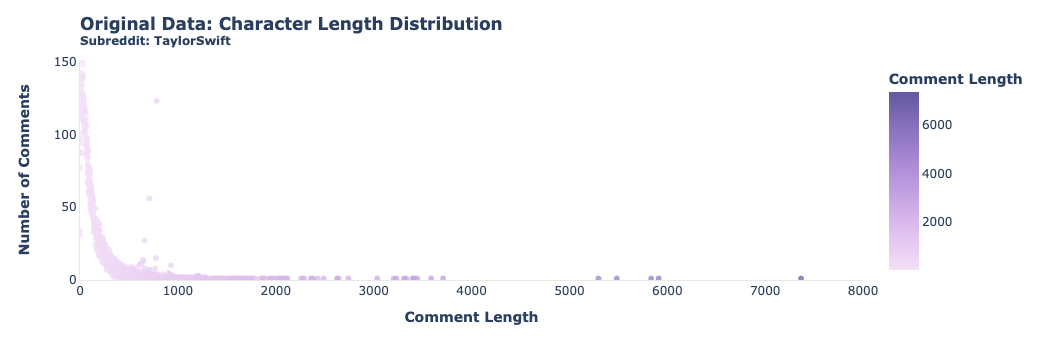

In [107]:
fig = px.scatter(comment_count_df, x='length_body', y='comment_count', color='length_body', 
                labels={'length_body': '<b>Comment Length</b>', 'comment_count': '<b>Number of Comments</b>'},
                opacity=0.7, 
                color_continuous_scale='purp'
               )

fig.update_traces(marker=dict(size=40),
                  selector=dict(mode='markers+text'))

fig.update_layout(legend_title_text="Comment Length")
fig.update_xaxes(range=[0, 8000])
fig.update_yaxes(range=[0, comment_count_df['comment_count'].max()])

# Add a subtitle as a text annotation
fig.update_layout(
    title=go.layout.Title(
        text="<b>Original Data: Character Length Distribution</b> <br><sup><b>Subreddit: TaylorSwift</b></sup>",
        xref="paper",
        x=0
    )
    )
# Set the background color to white
fig.update_layout(plot_bgcolor='white')

# Add axis lines
fig.update_xaxes(showline=True, linewidth=1, linecolor='#E8E8E8')
fig.update_yaxes(showline=True, linewidth=1, linecolor='#E8E8E8')

# Save the plot as an HTML file
#fig.write_html("Users/cs2046/fall-2023-reddit-project-team-21/plots/comment_count.html")

fig.show()

**Caption**: The bar plot illustrates the relationship between comment length and comment frequency in the r/taylorswift subreddit. It reveals a pattern where shorter comments attract higher engagement, while longer comments tend to receive fewer responses.

The above plot provides insights into the relationship between the number of comments and the length of the comments (represented by the body column) in the r/taylorswift subreddit. Upon examining the scatter plot, it becomes apparent that there is a notable pattern. Specifically, a high number of comments tend to occur when the comment length is relatively short. In contrast, when the comment length becomes considerably longer, the number of comments dwindles, often to just one or two.

This pattern suggests that there is a preference among users to engage in shorter comments, leading to higher comment frequency, while longer comments are less common and tend to receive fewer responses. This could indicate that the community values brevity and concise interactions for this particular subreddit, possibly driven by the nature of the content or user preferences.

### Important words according to TF-IDF (Term Frequency-Inverse Document Frequency)

To extract the most important words in the dataset, we employ the TF-IDF vectorizer. TF-IDF is a numerical statistic that reflects the importance of a word in a document relative to a collection of documents. In the context of our comments dataset, it helps highlight words that are not only frequent in individual comments but also distinctive across the entire dataset.

The TF-IDF process assigns a weight to each word based on its frequency in a specific comment and its rarity across all comments. Words with higher TF-IDF scores are considered more important or unique to a particular comment, providing valuable insights into the distinctive features of different comments in the dataset.

In [40]:
from pyspark.ml.feature import Tokenizer

sentenceData = ts_comm_cleaned.select(ts_comm_cleaned["body"])


tokenizer = Tokenizer(inputCol="body", outputCol="words")
wordsData = tokenizer.transform(sentenceData)


hashingTF = HashingTF(inputCol="words", outputCol="rawFeatures", numFeatures=20)
featurizedData = hashingTF.transform(wordsData)

idf = IDF(inputCol="rawFeatures", outputCol="features")
idfModel = idf.fit(featurizedData)
rescaledData = idfModel.transform(featurizedData)

for features_label in rescaledData.select("features", "words").take(3):
    print(features_label)

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 43, Finished, Available)

Row(features=SparseVector(20, {0: 0.6013, 1: 0.6921, 2: 2.5401, 3: 0.8967, 4: 1.1008, 5: 0.6597, 6: 1.5131, 7: 0.5331, 11: 0.5565, 12: 0.5687, 13: 1.2505, 14: 0.8018, 15: 1.1051, 16: 1.1489, 17: 1.7982, 18: 0.7217}), words=["it's", 'about', 'trauma', 'it', 'describes', 'it', 'in', 'the', 'form', 'of', 'religious', 'trauma...', 'the', 'fact', 'that', 'she', 'still', 'regrets', 'him', 'after', 'this', 'long', 'just', 'shows', 'how', 'deep', 'the', 'wounds', 'were'])
Row(features=SparseVector(20, {1: 0.6921, 3: 0.4484, 4: 0.5504, 5: 0.6597, 11: 1.1129, 13: 1.2505, 14: 0.8018, 16: 0.383}), words=['tickets', 'are', 'already', 'on', 'stubhub', 'for', 'thousands.', '$$$$', 'this', 'sucks.'])
Row(features=SparseVector(20, {0: 1.2026, 2: 0.8467, 4: 0.5504, 6: 0.5044, 7: 1.0662, 8: 0.9566, 9: 0.4526, 11: 0.5565, 14: 0.8018, 15: 0.5526, 16: 0.7659, 17: 0.4496, 19: 1.544}), words=['mine', 'is', 'doing', 'the', 'same', 'thing;', 'others', 'have', 'said', 'just', 'to', 'keep', 'trying', 'and', 'it',

In [41]:
# Extracting important keywords using TF-IDF
# Selecting relevant columns for further analysis
keywords_df = rescaledData.select("words", "features")

# Exploding the array of words into separate rows
keywords_df = keywords_df.select("features", F.explode("words").alias("keyword"))

# Sorting the DataFrame in descending order based on TF-IDF scores
sorted_keywords_df = keywords_df.orderBy(F.col("features").desc())

# Displaying the sorted DataFrame with important keywords and their corresponding TF-IDF scores
sorted_keywords_df.show()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 44, Finished, Available)

+--------------------+--------------------+
|            features|             keyword|
+--------------------+--------------------+
|(20,[19],[1.54400...|                😭😭|
|(20,[19],[1.54400...|                 …me|
|(20,[19],[0.77200...|                fuck|
|(20,[19],[0.77200...|     deadendmaserati|
|(20,[19],[0.77200...|                omg!|
|(20,[19],[0.77200...|     eeee-eeee-eeee!|
|(20,[19],[0.77200...|            saaaame.|
|(20,[19],[0.77200...|                😲😵|
|(20,[19],[0.77200...|**aaaaaaaaaahhhhh...|
|(20,[19],[0.77200...|             willow*|
|(20,[19],[0.77200...|                100%|
|(20,[19],[0.77200...|                👏👏|
|(20,[19],[0.77200...|              exile.|
|(20,[19],[0.77200...|              🤣🤣🤣|
|(20,[19],[0.77200...|               betty|
|(20,[19],[0.77200...|               exile|
|(20,[19],[0.77200...|            midnight|
|(20,[19],[0.77200...|                 wow|
|(20,[19],[0.77200...|               ohhhh|
|(20,[19],[0.77200...|            finally

These words look vague and don't make much sense because the text column has not been cleaned yet. Lets create the Spark NLP Pipeline to clean the text data and then find out the most common words and the most important words.

Once the text data is cleaned, we can proceed to analyze the most common and important words using Spark NLP capabilities.

## NLP Processing Pipeline for Text Data Cleaning

In this section, we will implement a Natural Language Processing (NLP) pipeline to clean the text data extracted from the comments. The cleaned text will serve as the foundation for subsequent analyses, including sentiment analysis, identification of common keywords, and generating summaries to address our specific business goals.

The pipeline will encompass various text preprocessing steps, such as lowercasing, stripping, removal of punctuation, stopword removal, and lemmatization. By applying these techniques, we aim to enhance the quality and relevance of the text data, laying the groundwork for meaningful insights in the subsequent stages of our analysis.

In [42]:
from sparknlp.annotator import (Tokenizer, Normalizer,
                                LemmatizerModel, StopWordsCleaner)

from sparknlp.annotator import UniversalSentenceEncoder
from sparknlp.base import DocumentAssembler

cleaning_documentAssembler = DocumentAssembler()\
    .setInputCol("body")\
    .setOutputCol("document")

cleaning_use = UniversalSentenceEncoder.pretrained(name="tfhub_use", lang="en")\
 .setInputCols(["document"])\
 .setOutputCol("sentence_embeddings")

# Regex Tokenizer to break words
cleaning_tokenizer = Tokenizer() \
     .setInputCols(['document']) \
     .setOutputCol('token')

# Normalizing and setting case insensitive to be true
cleaning_normalizer = Normalizer() \
     .setInputCols(['token']) \
     .setOutputCol('normalized') \
     .setLowercase(True)

# Lemmatizing
cleaning_lemmatizer = LemmatizerModel.pretrained() \
     .setInputCols(['normalized']) \
     .setOutputCol('lemma')

# Remove Stopwords
cleaning_stopwords_cleaner = StopWordsCleaner() \
     .setInputCols(['lemma']) \
     .setOutputCol('clean_lemma') \
     .setCaseSensitive(False) \
     .setStopWords(eng_stopwords)

# finisher converts tokens to human-readable output
cleaning_finisher = Finisher() \
     .setInputCols(['clean_lemma']) \
     .setCleanAnnotations(False)

# Create the pipeline
cleaning_pipeline = Pipeline() \
     .setStages([
           cleaning_documentAssembler,
           cleaning_tokenizer,
           cleaning_normalizer,
           cleaning_lemmatizer,
           cleaning_stopwords_cleaner,
           cleaning_finisher
     ])

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 45, Finished, Available)

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
lemma_antbnc download started this may take some time.
Approximate size to download 907.6 KB
[OK!]


Lets fit the pipeline to an empty dataframe

In [43]:
empty_df = spark.createDataFrame([['']]).toDF("body")
cleaning_pipeline_model = cleaning_pipeline.fit(empty_df)

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 46, Finished, Available)

Now that the pipeline has been fit, we will transform our comments spark dataframe for text cleaning.

In [44]:
cleaned_ts_comm = cleaning_pipeline_model.transform(ts_comm_cleaned)
cleaned_ts_comm.printSchema()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 47, Finished, Available)

root
 |-- author: string (nullable = true)
 |-- author_flair_text: string (nullable = true)
 |-- body: string (nullable = true)
 |-- can_gild: boolean (nullable = true)
 |-- controversiality: long (nullable = true)
 |-- created_utc: timestamp (nullable = true)
 |-- edited: string (nullable = true)
 |-- gilded: long (nullable = true)
 |-- id: string (nullable = true)
 |-- is_submitter: boolean (nullable = true)
 |-- link_id: string (nullable = true)
 |-- parent_id: string (nullable = true)
 |-- permalink: string (nullable = true)
 |-- retrieved_on: timestamp (nullable = true)
 |-- score: long (nullable = true)
 |-- stickied: boolean (nullable = true)
 |-- subreddit: string (nullable = true)
 |-- subreddit_id: string (nullable = true)
 |-- length_body: integer (nullable = true)
 |-- document: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- annotatorType: string (nullable = true)
 |    |    |-- begin: integer (nullable = false)
 |    |    |-- end: in

In [45]:
cleaned_ts_comm = cleaned_ts_comm.withColumn("text", F.concat_ws(" ", "finished_clean_lemma"))
cleaned_ts_comm.select(cleaned_ts_comm.text).show(5)

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 48, Finished, Available)

+--------------------+
|                text|
+--------------------+
|trauma describe f...|
|ticket already st...|
|thing say keep tr...|
|                    |
|sign two emails o...|
+--------------------+
only showing top 5 rows



## Most common words

Now that the text has been cleaned using the Spark NLP pipeline, we will run the code again to witness the most common words in the entire clean comments.

In [46]:
word_count = cleaned_ts_comm.withColumn('word', F.explode(F.split(F.col('text'), ' ')))\
    .groupBy('word')\
    .count()\
    .sort('count', ascending=False)
word_count.printSchema()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 49, Finished, Available)

root
 |-- word: string (nullable = false)
 |-- count: long (nullable = false)



In [47]:
word_count.show()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 50, Finished, Available)

+------+-----+
|  word|count|
+------+-----+
|  like| 3455|
|  song| 3299|
| think| 3005|
|   get| 2910|
|    im| 2651|
|taylor| 2587|
|  love| 2170|
|   one| 2084|
|  post| 1908|
| album| 1879|
|    go| 1796|
|  dont| 1763|
|  make| 1689|
|   say| 1638|
|  know| 1625|
| would| 1551|
|  time| 1462|
|  well| 1419|
|   see| 1401|
|really| 1368|
+------+-----+
only showing top 20 rows



#### Inference

The DataFrame presented above showcases the top 20 most common words found in the cleaned comments dataset from the TaylorSwift subreddit. Each row represents a unique word, and the "count" column indicates the frequency of each word in the dataset.

These counts provide insights into the most frequently used words, offering a glimpse into the common themes or topics discussed in the TaylorSwift subreddit comments. Further analysis can be conducted based on these findings.

#### Emphasis on the Most Common Word: "like"

The word **"like"** stands out as the most frequently used word in the cleaned comments dataset from the TaylorSwift subreddit, appearing 3455 times. Several factors contribute to the prominence of this word:

1. **Versatility:** "Like" is a versatile word that can serve various grammatical roles, including conjunction, preposition, verb, and adjective. Its adaptability allows it to appear in diverse contexts within sentences.

2. **Comparisons and Similarities:** In casual online conversations, individuals often use "like" to draw comparisons or express similarities between different things, events, or experiences. For example, users might say, "This song is like a masterpiece" or "I feel like she's my friend."

3. **Informal Language:** The TaylorSwift subreddit may feature informal discussions and expressions, where "like" is commonly used as a filler word, emphasizing a conversational and relatable tone.

#### Insights into Other Common Words:

1. **"song":** Given the subreddit's focus on Taylor Swift, discussions about her songs, new releases, and fan favorites contribute to the high frequency of the word "song."

2. **"think":** Indicates the expression of opinions, reflections, or considerations. Users might use "think" to share thoughts on Taylor Swift's music, career, or personal impact.

3. **"get":** This word may be employed to convey obtaining or understanding information, such as "I get what you mean" or "Where can I get this song?"

4. **"im":** An abbreviation for "I'm" (I am), reflecting the casual and conversational style often adopted in online discussions.

5. **"taylor":** The direct reference to the artist herself. Given the subreddit's theme, the frequent use of "Taylor" is expected in discussions about her.

6. **"love":** Expresses positive sentiments and admiration, commonly used when discussing favorite songs, albums, or moments related to Taylor Swift.

Understanding the context and themes surrounding these common words provides valuable insights into the nature of discussions within the TaylorSwift subreddit.

## Comment length

In [48]:
cleaned_ts_comm = cleaned_ts_comm.withColumn("length_clean_body",F.length(cleaned_ts_comm.text))
# We only need comments that have length greater than zero.
cleaned_ts_comm = cleaned_ts_comm.filter(cleaned_ts_comm['length_clean_body'] > 0)
clean_comment_count_df = cleaned_ts_comm.groupBy("length_clean_body").agg(F.count("length_clean_body").alias('comment_count')).toPandas()
# Sort the dataframe in descending order as per count
clean_comment_count_df = clean_comment_count_df.sort_values(by='comment_count', ascending=False).reset_index()
clean_comment_count_df.drop(columns=['index'], inplace=True)
clean_comment_count_df

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 51, Finished, Available)

,length_clean_body,comment_count
0,5,264
1,14,245
2,9,245
3,13,231
4,10,229
...,...,...
705,1411,1
706,670,1
707,471,1
708,472,1


In [50]:
# Define the bin edges
bin_edges = [i * 1000 for i in range(6)]  

# Calculate the histogram
hist, bin_edges = np.histogram(clean_comment_count_df['length_clean_body'], bins=bin_edges)

# Create a Plotly figure
fig = px.histogram(clean_comment_count_df, x='length_clean_body', nbins=len(bin_edges), opacity=0.7, labels={'length_clean_body': 'Length of Body'})

# Add a border to the bars
fig.update_traces(marker=dict(line=dict(color='black', width=1), color='#D8BFD8'))

fig.update_layout(
    xaxis_title='<b>Length of Body</b>',
    yaxis_title='<b>Comments Counts</b>',
)

fig.update_layout(
    title=go.layout.Title(
        text="<b>Clean Data: Character Length Distribution</b> <br><sup><b>Subreddit: TaylorSwift</b></sup>",
        xref="paper",
        x=0
    )
    )
# Set the background color to white
fig.update_layout(plot_bgcolor='white')

# Add axis lines
fig.update_xaxes(showline=True, linewidth=1, linecolor='#E8E8E8')
fig.update_yaxes(showline=True, linewidth=1, linecolor='#E8E8E8')

# Save the plot as an HTML file
fig.write_html("Users/cs2046/fall-2023-reddit-project-team-21/plots/clean_comment_count_plot.html")

fig.show()


StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 53, Finished, Available)

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 102, Finished, Available)

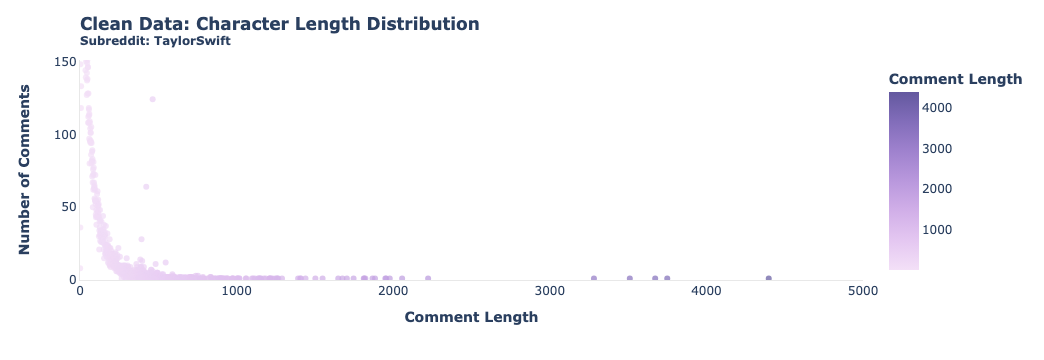

In [117]:
fig = px.scatter(clean_comment_count_df, x='length_clean_body', y='comment_count', color='length_clean_body', 
                labels={'length_clean_body': '<b>Comment Length</b>', 'comment_count': '<b>Number of Comments</b>'},
                opacity=0.7, 
                color_continuous_scale='purp'
               )

fig.update_traces(marker=dict(size=40),
                  selector=dict(mode='markers+text'))

fig.update_layout(legend_title_text="Comment Length")
fig.update_xaxes(range=[0, 5000])
fig.update_yaxes(range=[0, comment_count_df['comment_count'].max()])

# Add a subtitle as a text annotation
fig.update_layout(
    title=go.layout.Title(
        text="<b>Clean Data: Character Length Distribution</b> <br><sup><b>Subreddit: TaylorSwift</b></sup>",
        xref="paper",
        x=0
    )
    )

# Set the background color to white
fig.update_layout(plot_bgcolor='white')

# Add axis lines
fig.update_xaxes(showline=True, linewidth=1, linecolor='#E8E8E8')
fig.update_yaxes(showline=True, linewidth=1, linecolor='#E8E8E8')

# Save the plot as an HTML file
#fig.write_html("Users/cs2046/fall-2023-reddit-project-team-21/plots/clean_comment_count_plot.html")

fig.show()

**Caption**: "The bar plot illustrates the relationship between comment length and comment frequency in the r/taylorswift subreddit after cleaning the body column. It reveals a pattern where shorter comments attract higher engagement, while longer comments tend to receive fewer responses

After conducting text cleaning and natural language processing (NLP) on the data, it becomes evident that a significant portion of the original comment content has been removed or modified. However, the key observation remains consistent with the previous plot: there is a strong correlation between comment length and comment frequency. Specifically, we continue to observe that a higher number of comments are associated with shorter comment lengths, while conversely, fewer comments are generated for longer comments.

## Most important keywords using TF-IDF (Term Frequency-Inverse Document Frequency)

In [51]:
from pyspark.ml.feature import Tokenizer

sentenceData = cleaned_ts_comm.select(cleaned_ts_comm["text"])


tokenizer = Tokenizer(inputCol="text", outputCol="words")
wordsData = tokenizer.transform(sentenceData)


hashingTF = HashingTF(inputCol="words", outputCol="rawFeatures", numFeatures=20)
featurizedData = hashingTF.transform(wordsData)

idf = IDF(inputCol="rawFeatures", outputCol="features")
idfModel = idf.fit(featurizedData)
rescaledData = idfModel.transform(featurizedData)

for features_label in rescaledData.select("features", "words").take(3):
    print(features_label)

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 54, Finished, Available)

Row(features=SparseVector(20, {1: 1.1177, 2: 1.0533, 4: 0.936, 5: 0.9967, 11: 0.9124, 12: 0.892, 13: 1.8526, 15: 0.8458, 18: 2.3048, 19: 0.9853}), words=['trauma', 'describe', 'form', 'religious', 'trauma', 'fact', 'still', 'regret', 'long', 'show', 'deep', 'wounds'])
Row(features=SparseVector(20, {2: 1.0533, 4: 0.936, 5: 0.9967, 9: 0.8639, 14: 1.0207}), words=['ticket', 'already', 'stubhub', 'thousands', 'suck'])
Row(features=SparseVector(20, {2: 1.0533, 4: 0.936, 7: 0.8639, 13: 0.9263, 14: 1.0207, 16: 1.1687, 17: 0.7995}), words=['thing', 'say', 'keep', 'try', 'eventually', 'might', 'work'])


In [52]:
# Extracting important keywords using TF-IDF

# Selecting relevant columns for further analysis
keywords_df = rescaledData.select("words", "features")

# Exploding the array of words into separate rows
keywords_df = keywords_df.select("features", F.explode("words").alias("keyword"))

# Sorting the DataFrame in descending order based on TF-IDF scores
sorted_keywords_df = keywords_df.orderBy(F.col("features").desc())

pandas_sorted_keywords = sorted_keywords_df.toPandas()
# The 'features' column contains tuples, and we want the last element of each tuple (TF-IDF score)
pandas_sorted_keywords['max_tfidf_score'] = pandas_sorted_keywords['features'].apply(lambda x: max(x))

# Sorting the DataFrame by TF-IDF score in descending order
pandas_sorted_keywords = pandas_sorted_keywords.sort_values(by='max_tfidf_score', ascending=False).reset_index()
pandas_sorted_keywords.drop(columns=['index'], inplace=True)

sorted_tfidf_df = pandas_sorted_keywords[['keyword', 'max_tfidf_score']]

# Display the dataframe
sorted_tfidf_df

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 55, Finished, Available)

,keyword,max_tfidf_score
0,often,48.993559
1,nominationawards,48.993559
2,taylor,48.993559
3,make,48.993559
4,social,48.993559
...,...,...
270423,cardigan,0.696027
270424,ironic,0.696027
270425,literallyy,0.696027
270426,paper,0.696027


In [53]:
# Convert the PySpark DataFrame to a Pandas DataFrame
pandas_df = rescaledData.select("text").toPandas()

# Tokenize the text into words and explode them into separate rows
words_data = pandas_df["text"].str.split().explode()

# Count the frequency of each word
word_count = words_data.value_counts().reset_index()

word_count.columns = ["keyword", "word_count"]

# Join the TF-IDF DataFrame with the word count DataFrame
tfidf_with_count = sorted_tfidf_df.merge(word_count, on="keyword", how="left")

# Display the DataFrame with TF-IDF scores and word counts
tfidf_with_count

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 56, Finished, Available)

,keyword,max_tfidf_score,word_count
0,often,48.993559,62
1,nominationawards,48.993559,1
2,taylor,48.993559,2587
3,make,48.993559,1689
4,social,48.993559,75
...,...,...,...
270423,cardigan,0.696027,126
270424,ironic,0.696027,7
270425,literallyy,0.696027,1
270426,paper,0.696027,74


In [121]:
keyword_importance_chart = alt.Chart(tfidf_with_count.head(20)).mark_bar().encode(
    x=alt.X('word_count:Q', axis=alt.Axis(title='Word Count')),  # Rename X-axis
    y=alt.Y('keyword:N', sort='-x', axis=alt.Axis(title='Keywords')),  # Rename Y-axis
    color=alt.value('#E55451'),
    tooltip=['keyword:N', 'max_tfidf_score:Q', 'word_count:Q']
).properties(
    title='Top 20 Keyword Importance Count with TF-IDF Score',
    width=600,
    height=400
)

# Save the plot
#keyword_importance_chart.save("Users/cs2046/fall-2023-reddit-project-team-21/plots/keyword_importance_chart.html")

# Display the chart
keyword_importance_chart

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 106, Finished, Available)

alt.Chart(...)

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 57, Finished, Available)

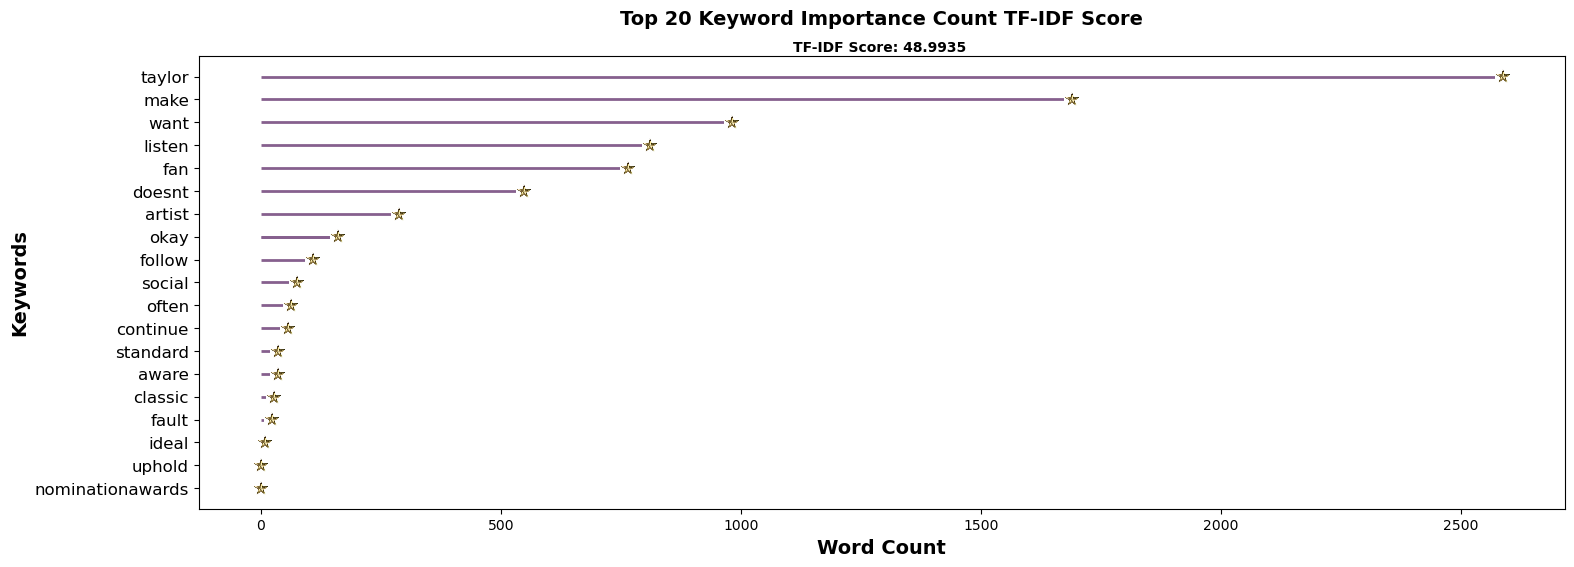

In [54]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
tfidf_with_count_sorted = tfidf_with_count.head(20).sort_values(by='word_count')

fig, ax = plt.subplots(figsize=(16, 6))

# Create horizontal line plot for missing values
ax.hlines(
    y=tfidf_with_count_sorted['keyword'],  
    xmin=0,  
    xmax=tfidf_with_count_sorted['word_count'],  
    color='#86608e',  
    linewidth=2,  
)

# Define the smaller zoom factor for the lollipop stick images
small_zoom = 0.05

# Add lollipop stick images
for index, row in tfidf_with_count_sorted.iterrows():
    stick_image = plt.imread('Users/cs2046/fall-2023-reddit-project-team-21/plots/img/star.jpeg')  
    stick_imagebox = OffsetImage(stick_image, zoom=small_zoom)
    ab = AnnotationBbox(
        stick_imagebox,
        (row['word_count'], row['keyword']),  
        frameon=False,
    )
    ax.add_artist(ab)

# Change the axis labels
ax.set_ylabel('Keywords', fontsize=14, fontweight='bold')
ax.set_xlabel('Word Count', fontsize=14, fontweight='bold')

# Title and subtitle with bold and adjusted font sizes
title = "Top 20 Keyword Importance Count TF-IDF Score"
subtitle = "TF-IDF Score: 48.9935 "
ax.text(0.5, 1.07, title, transform=ax.transAxes, fontsize=14, fontweight='bold', ha='center')
ax.text(0.5, 1.01, subtitle, transform=ax.transAxes, fontsize=10, fontweight='bold', ha='center')

# Increase tick size for y-axis
ax.tick_params(axis='y', which='both', labelsize=12)

# Save the plot as a JPEG image
plt.tight_layout()
plt.savefig('Users/cs2046/fall-2023-reddit-project-team-21/plots/keyword_importance_chart.png', dpi=300)  
plt.show()

**Caption**: "The Altair bar chart effectively conveys the significance of the top 20 keywords within the comments, as determined by their maximum TF-IDF scores and respective word counts. This visualization offers valuable insights into the importance of keywords within the dataset."

The generated Altair bar chart effectively visualizes the importance of the top 20 keywords based on their maximum TF-IDF scores and their respective word counts within the comments. This chart provides valuable insights into the significance of keywords in the context of the dataset.

In this chart, 'taylor' stands out as the most prominent keyword, boasting a maximum TF-IDF score of 48.99. This score underscores the word's substantial importance within the comments, indicating its prevalence and significance in the discussions. 'Make' and 'want' also command noteworthy TF-IDF scores, further emphasizing their central role in the conversations.

What's particularly intriguing is the uniformity of maximum TF-IDF scores among the top 20 keywords. Each of these keywords, despite their diversity, shares the same maximum TF-IDF score. This remarkable consistency implies that these specific keywords hold equally distinctive and crucial positions across various documents, highlighting their unwavering importance within the analyzed text data.

Additionally, the chart reveals intriguing patterns. Some keywords, such as 'nominationawards' and 'uphold,' exhibit high TF-IDF scores but relatively low word counts, suggesting their specificity within the dataset. Conversely, more common terms like 'fan,' 'listen,' and 'artist' strike a balance between their TF-IDF scores and word counts, indicating their widespread usage and significance in the discussions.

**Note:**

1. A higher TF-IDF score indicates that the word is both frequent within a specific document (or comment) and rare across the entire dataset, highlighting its significance within that particular context.

2. Emphasis is placed on keywords with the highest TF-IDF scores, suggesting their uniqueness and substantial contribution to the meaning of the documents in which they appear. Notable terms with high TF-IDF scores, such as 'approval,' 'video,' 'degree,' among others, signify their distinctiveness and importance within the analyzed text data.

## Analyzing `max_tfidf_score` Distribution

As previously noted, it was unexpected to observe that the top 20 most important keywords in our dataset share the same `max_tfidf_score`.

In order to gain insights into this phenomenon, we've plotted the distribution of these scores. This visualization provides information on how many keywords have identical scores, shedding light on the overall pattern and potentially revealing any underlying trends.

By examining the distribution of `max_tfidf_score`, we aim to discern whether this uniformity in scores is a consistent pattern across multiple keywords or if there are variations that could offer additional context to our analysis.

In [55]:
grouped_df = sorted_tfidf_df.groupby('max_tfidf_score').size().reset_index(name='count')
# Sorting the DataFrame by TF-IDF score in descending order
grouped_df = grouped_df.sort_values(by='count', ascending=False).reset_index()
grouped_df.drop(columns=['index'], inplace=True)

# Round off the values to 4 decimal places
grouped_df['max_tfidf_score'] = grouped_df['max_tfidf_score'].round(4)

# Save the csv file
#grouped_df.to_csv('Users/rs2190/Project/fall-2023-reddit-project-team-21/data/csv/max_tfidf_distribution.csv', index=False)
grouped_df

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 58, Finished, Available)

,max_tfidf_score,count
0,6.7059,6192
1,2.5917,3823
2,3.4556,3618
3,5.5883,3534
4,1.1687,3476
...,...,...
305,11.6865,58
306,0.6960,58
307,13.1037,53
308,9.4899,47


In [56]:
# Filter the data to include only rows where count > 0
grouped_df = grouped_df[grouped_df['count'] > 0]

# Create the Altair chart
max_tfidf_distribution = alt.Chart(grouped_df).mark_bar().encode(
    x=alt.X('max_tfidf_score:O', axis=alt.Axis(title='TF-IDF Score')),
    y=alt.Y('count:Q', axis=alt.Axis(title='Count')),
    color=alt.value('#d0c3d8'),
    tooltip=['max_tfidf_score:O', 'count:Q']
).properties(
    title='Count of Max TF-IDF Scores'
)

# Configure axis and view settings
max_tfidf_distribution = max_tfidf_distribution.configure_axis(grid=False)  # Remove grid


# Save the plot (optional)
max_tfidf_distribution.save("Users/cs2046/fall-2023-reddit-project-team-21/plots/max_tfidf_distribution.html")

# Display the chart
max_tfidf_distribution.interactive()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 59, Finished, Available)

alt.Chart(...)

**Caption**: "The bar chart provides a comprehensive view of the distribution of max_tfidf_score values within the dataset. A notable pattern emerges, revealing a concentration of keywords around a max_tfidf_score of approximately 6.8017, with a substantial count of 6192. This clustering suggests a significant number of keywords sharing similar levels of importance."

Upon thorough analysis, a noticeable pattern emerges from the distribution of max_tfidf_score in the dataset. The preeminent observation is the prevalence of keywords clustered around a max_tfidf_score of approximately 6.8017, with an accompanying high count of 6192. This concentration implies a significant number of keywords sharing similar levels of importance.

The bar chart enhances this understanding by mapping the discrete max_tfidf_score values on the x-axis against the corresponding count of keywords on the y-axis. The prominence of the bar at 6.8017 aligns with the peak count in the dataset, providing a visual representation of the observed concentration.

Moreover, the chart highlights the diversity in importance levels among different keywords. Several max_tfidf_score values exhibit lower counts, indicating variations in significance. This diversity can be attributed to the distinct characteristics of each keyword in terms of its frequency and rarity within the dataset.

Notably, the bar chart emphasizes the range of max_tfidf_score values, showcasing a maximum score of approximately 49.7599 with a count of 473, and a minimum score of around 0.7119 with a count of 58. This spread underscores the varying degrees of importance assigned to keywords, contributing to a nuanced interpretation of the dataset.

## Bi-gram Network Analysis

Before proceeding to sentiment analysis, let's explore the connections between key words within the comments to identify significant bi-gram relationships. This analysis aims to uncover how frequently such word pairs are utilized by authors within the comments.

To initiate this exploration, we started with the 'body' column of the cleaned comments. This column contains the raw text data from which we aim to extract meaningful bi-grams. The subsequent steps involve preprocessing the text to prepare it for analysis. Tokenization breaks down the comments into individual words, enabling us to capture these words' interplay. Bi-grams, or pairs of consecutive words, offer a more nuanced perspective on how language is employed, allowing us to grasp specific word combinations and their frequency of occurrence.

Once we have obtained and processed the data, the next step is to create a network plot. This visual representation is instrumental in providing a clear and intuitive understanding of the relationships between bi-grams within the dataset. Network plots allow us to visualize the connections and interactions between words, making it easier to discern patterns and uncover insights.

In [129]:
from pyspark.ml.feature import StopWordsRemover
from pyspark.ml.feature import Tokenizer, NGram
from pyspark.ml import Pipeline

# Tokenize the text into words
tokenizer = Tokenizer(inputCol="text", outputCol="words")
wordsData = tokenizer.transform(cleaned_ts_comm)

# Create bi-grams (2-grams) from the words
ngram = NGram(n=2, inputCol="words", outputCol="bigrams")
ngramDataFrame = ngram.transform(wordsData)

# Remove stop words
remover = StopWordsRemover(inputCol="bigrams", outputCol="filteredBigrams")
ngramDataFrame = remover.transform(ngramDataFrame)

# Explode the filtered bigrams into separate rows
explodedBigrams = ngramDataFrame.select(F.explode("filteredBigrams").alias("bigram"))

# Split the bigram into two separate columns
explodedBigrams = explodedBigrams.withColumn("word1", F.split("bigram", " ")[0])
explodedBigrams = explodedBigrams.withColumn("word2", F.split("bigram", " ")[1])

# Count the occurrences of bigrams
bigramCounts = explodedBigrams.groupBy("word1", "word2").agg(F.count("*").alias("count"))

# Filter out common bigrams (you can add more stopwords as needed)
stopwords = ["the", "a", "and", "etc."]
bigramCountsFiltered = bigramCounts.filter(~F.col("word1").isin(stopwords) & ~F.col("word2").isin(stopwords))

# Get the bigrams
bigram_data = bigramCountsFiltered.orderBy("count", ascending=False).toPandas()
# Filter rows where count is greater than 1
filtered_bigram_data = bigram_data[bigram_data['count'] > 100]

# Show the top 15 bigrams
top15Bigrams = bigramCountsFiltered.orderBy("count", ascending=False).limit(15)
top15Bigrams.show()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 114, Finished, Available)

+--------------------+--------------------+-----+
|               word1|               word2|count|
+--------------------+--------------------+-----+
|              taylor|               swift|  459|
|                feel|                like|  455|
|              action|             perform|  384|
|             perform|       automatically|  384|
|                 bot|              action|  384|
|            question|             concern|  383|
|       automatically|              please|  383|
|              please|             contact|  383|
|             contact|           moderator|  383|
|subredditmessagec...|            question|  383|
|           moderator|subredditmessagec...|  383|
|                dont|               think|  302|
|                post|             approve|  292|
|             modmail|             message|  257|
|             message|                 ask|  257|
+--------------------+--------------------+-----+



StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 115, Finished, Available)

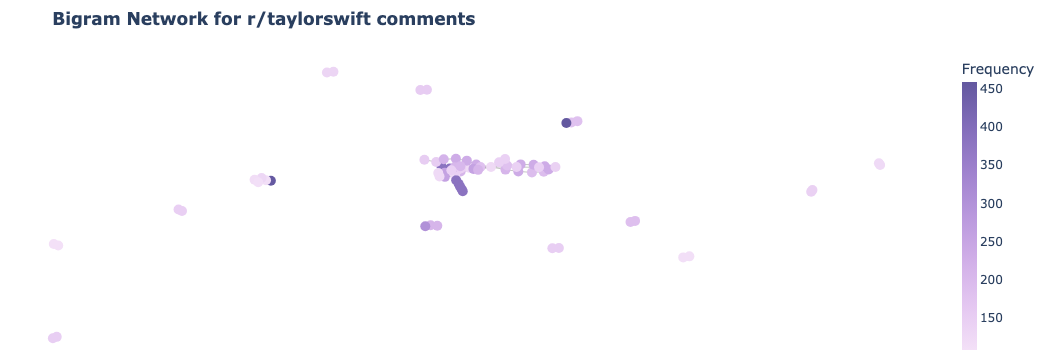

In [130]:
import networkx as nx
import pandas as pd
import plotly.graph_objects as go

# Create a graph object
G = nx.Graph()

# Add nodes and edges to the graph
for i, row in filtered_bigram_data.iterrows():
    word1 = row["word1"]
    word2 = row["word2"]
    count = row["count"]
    G.add_node(word1, count=count)  # Store count as node attribute
    G.add_node(word2, count=count)  # Store count as node attribute
    G.add_edge(word1, word2, weight=count)

# Define node positions using a layout algorithm
pos = nx.spring_layout(G, seed=42)

# Create edge traces
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=0.5, color="#888"),
    hoverinfo="none",
    mode="lines"
)

# Create node traces with varying colors based on count and display count on hover
node_x = []
node_y = []
node_text = []
node_color = []  # List to store node colors
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(f"{node}<br>Count: {G.nodes[node]['count']}")  # Include count in hover text
    node_color.append(G.nodes[node]["count"])  # Get the count attribute for color

node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    mode="markers",
    hoverinfo="text",  # Show hover text with node name and count
    text=node_text,
    marker=dict(
        size=10,
        color=node_color,  # Set node color based on count
        colorscale="purp",  
        colorbar=dict(
            thickness=15,
            title="Frequency",
            xanchor="left"
        )
    )
)

# Create a figure and set background color to grey
fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title="<b>Bigram Network for r/taylorswift comments</b>",
        font=dict(size=12),
        showlegend=False,
        hovermode="closest",
        margin=dict(b=0, l=0, r=0, t=50),  # Adjust the top margin to make room for the title
        xaxis=dict(showgrid=False, zeroline=False, visible=False),  # Hide x-axis
        yaxis=dict(showgrid=False, zeroline=False, visible=False),  # Hide y-axis
        plot_bgcolor="white",
    )
)

# Save the plot
fig.write_html("Users/cs2046/fall-2023-reddit-project-team-21/plots/bigram_plot.html")

# Display the plot
fig.show()

**Caption**: "The network plot reveals the relationships between bi-grams within the comments of the r/taylorswift subreddit. To ensure clarity and comprehensibility, we have filtered for bi-grams with counts exceeding 100, considering this as a threshold for meaningful analysis. While most bi-grams exhibit balanced co-occurrence patterns, the vibrant red connections highlight highly frequent word pairs, including 'taylor-swift,' 'feel-like,' 'perform-automatically,' and 'perform-action.'"

From the above network plot, several key observations emerge. Upon initial examination, it becomes apparent that the majority of the bi-grams exhibit a relatively balanced distribution in terms of their frequency of co-occurrence (often represented as the 'n value'). These bi-grams are dispersed throughout the plot, forming clusters and connections that represent common language patterns used within the comments.

However, it's important to note that the network plot focuses specifically on bi-grams with counts exceeding 100. This deliberate selection allows us to present a clearer and more focused analysis within this subset of the data. By doing so, we prioritize the most significant and frequently occurring word pairs, enhancing the interpretability of the plot and avoiding clutter.

However, upon closer inspection and zooming in on specific regions of the plot, we encounter striking patterns of bright red coloration. This vivid red hue indicates that certain pairs of words are connected significantly more frequently than the rest. These standout bi-grams are characterized by their high 'n value,' suggesting that they are used repeatedly and prominently by authors in the comments.

Some notable examples of such highly connected bi-grams include 'taylor-swift,' 'feel-like,' 'perform-automatically,' 'perform-action,' and others. These word combinations are central hubs in the network, suggesting that they hold particular significance within the discussions taking place in the dataset. They are likely associated with recurring themes, discussions, or sentiments that resonate strongly with the community.

The prominence of these highly connected bi-grams underscores their role as key phrases that encapsulate important aspects of the conversation within the r/taylorswift subreddit. By identifying and examining these central hubs, we gain valuable insights into the most prevalent language patterns and topics of interest among the commenters.

In [ ]:
cleaned_ts_comm.write.parquet('azureml://datastores/workspaceblobstore/paths/textCleaned')

## Read the cleaned data

In [57]:
cleaned_comm_blob_path = 'azureml://datastores/workspaceblobstore/paths/textCleaned/part-*.snappy.parquet'
clean_comments = spark.read.parquet(cleaned_comm_blob_path, header=True)

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 60, Finished, Available)

In [132]:
clean_comments.printSchema()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 117, Finished, Available)

root
 |-- author: string (nullable = true)
 |-- author_flair_text: string (nullable = true)
 |-- body: string (nullable = true)
 |-- can_gild: boolean (nullable = true)
 |-- controversiality: long (nullable = true)
 |-- created_utc: timestamp (nullable = true)
 |-- edited: string (nullable = true)
 |-- gilded: long (nullable = true)
 |-- id: string (nullable = true)
 |-- is_submitter: boolean (nullable = true)
 |-- link_id: string (nullable = true)
 |-- parent_id: string (nullable = true)
 |-- permalink: string (nullable = true)
 |-- retrieved_on: timestamp (nullable = true)
 |-- score: long (nullable = true)
 |-- stickied: boolean (nullable = true)
 |-- subreddit: string (nullable = true)
 |-- subreddit_id: string (nullable = true)
 |-- length_body: integer (nullable = true)
 |-- document: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- annotatorType: string (nullable = true)
 |    |    |-- begin: integer (nullable = true)
 |    |    |-- end: int

In [59]:
clean_comm_count = clean_comments.count()
print(f'Number of rows in dataset: {clean_comm_count}')
print(f'Number of columns in dataset: {len(clean_comments.columns)}')

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 62, Finished, Available)

Number of rows in dataset: 18079
Number of columns in dataset: 27


In [64]:
clean_comm_txt = clean_comments.select('text')
clean_comm_txt.show()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 67, Finished, Available)

+--------------------+
|                text|
+--------------------+
|trauma describe f...|
|ticket already st...|
|thing say keep tr...|
|sign two emails o...|
|lol presale prema...|
|issue american ge...|
|        browser sure|
|alright guy check...|
|view source get i...|
|ive compile price...|
|exact thing happe...|
|      tampa move lol|
|                 yes|
|                move|
|isnt old catch in...|
|never buy seller ...|
|atl get right wou...|
|      atl still move|
|yep still pause a...|
|       chicago pause|
+--------------------+
only showing top 20 rows



## Dummy Variables - Ticketmaster and Albums

In [65]:
# Ticketmaster
ts_comm_w_ticketmaster = clean_comments.withColumn(
    "ticket_bool",
    clean_comments.text.rlike("ticketmaster*")
)

# Show counts
ts_comm_w_ticketmaster.groupBy("ticket_bool").count().show()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 68, Finished, Available)

+-----------+-----+
|ticket_bool|count|
+-----------+-----+
|       true|  164|
|      false|17915|
+-----------+-----+



In [66]:
# Ticketmaster
ts_comm_w_ticketAlbum = ts_comm_w_ticketmaster.withColumn(
    "album_bool",
    ts_comm_w_ticketmaster.body.rlike("(redtv|midnights|reputation|evermore|1989|speaknow|1989tv|fearless|taylorswift|lover|red|fearlesstv|folklore)")
)

# Show counts
ts_comm_w_ticketAlbum.groupBy("album_bool").count().show()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 69, Finished, Available)

+----------+-----+
|album_bool|count|
+----------+-----+
|      true| 2740|
|     false|15339|
+----------+-----+



In [67]:
ts_comm_w_ticketAlbum.show(2)

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 70, Finished, Available)

+---------+--------------------+--------------------+--------+----------------+-------------------+------+------+-------+------------+---------+---------+--------------------+-------------------+-----+--------+-----------+------------+-----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------------+-----------+----------+
|   author|   author_flair_text|                body|can_gild|controversiality|        created_utc|edited|gilded|     id|is_submitter|  link_id|parent_id|           permalink|       retrieved_on|score|stickied|  subreddit|subreddit_id|length_body|            document|               token|          normalized|               lemma|         clean_lemma|finished_clean_lemma|                text|length_clean_body|ticket_bool|album_bool|
+---------+--------------------+--------------------+--------+----------------+-------------------+------+------+-------+-------

In [ ]:
# Export
ts_comm_w_ticketAlbum.write.parquet("azureml://datastores/workspaceblobstore/paths/cleanedComments/cleanSubsetWDummy/")

StatementMeta(, , , Waiting, )

Both of these variables can be used to delve deeper into how redditors use the platform to engage with Taylor Swift and her music. Ticketmaster was specifically chosen due to the massive site crash that Taylor Swift's Eras tour sale caused - leading to likely more passionate engagement on the subreddit. Her album names were chosen as the second column to specifically see how many posts explicitly mention her music, which can then be used to create a subset of data that can allow us to dive deeper into music engagement.

## Wordcloud of clean data

In [68]:
# Convert PySpark DataFrame to Pandas DataFrame
clean_comm_txt_pandas = clean_comm_txt.toPandas()

# Combine all text data into a single string
text_data = ' '.join(clean_comm_txt_pandas['text'])

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 71, Finished, Available)

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 75, Finished, Available)

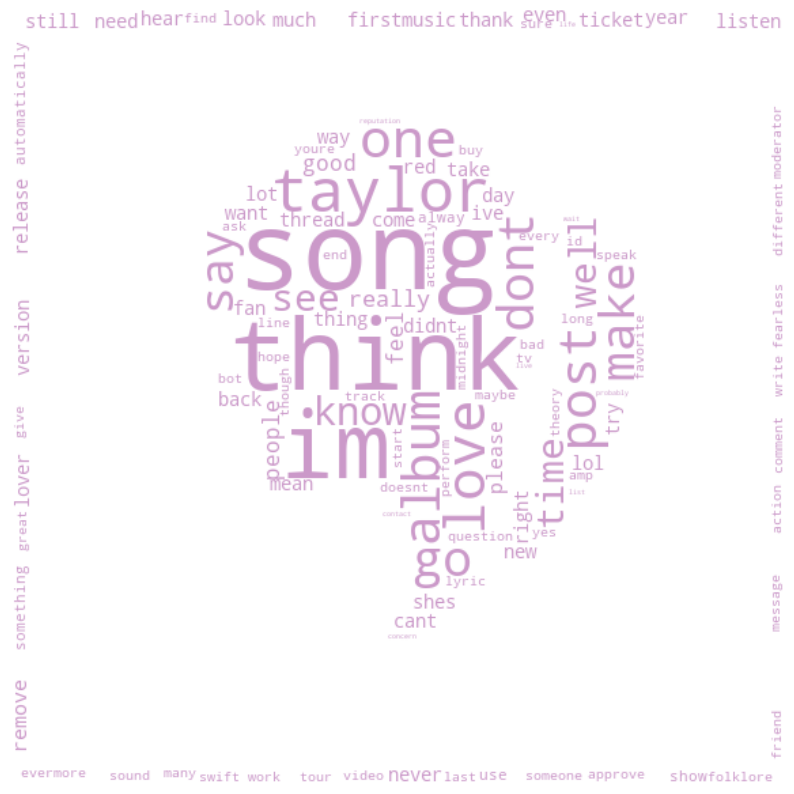

In [72]:
from imageio import imread
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_data = ' '.join(clean_comm_txt_pandas['text'])
mask = imread('Users/cs2046/fall-2023-reddit-project-team-21/plots/img/taylor2.jpeg')

# Set the color to red
color_func = lambda *args, **kwargs: "#cb99c9"

wc = WordCloud(
    background_color="white",
    mask=mask,
    collocations=False,  # Disable collocations to get individual words
    color_func=color_func  # Set the color function to red
).generate(text_data)

fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(16)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')


# Save the figure
plt.savefig('Users/cs2046/fall-2023-reddit-project-team-21/plots/reddit_taylor_wordcloud.png', bbox_inches='tight')

plt.show()

The word cloud displayed above provides valuable insights into the language patterns and key themes present within the cleaned comments of the r/taylorswift subreddit. The word cloud showcases a mixture of positive and negative words, reflecting the diverse sentiments expressed by the community. Additionally, prominent terms such as “tickets” and “album name” suggest discussions related to concert tickets and Taylor Swift’s albums are prevalent topics of conversation within the subreddit.

## Sentiment Analysis

In [73]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")
    
use = UniversalSentenceEncoder.pretrained(name="tfhub_use", lang="en")\
 .setInputCols(["document"])\
 .setOutputCol("sentence_embeddings")

sentimentdl = SentimentDLModel.pretrained(name="sentimentdl_use_twitter", lang="en")\
    .setInputCols(["sentence_embeddings"])\
    .setOutputCol("sentiment")

sentimentdl2 = ClassifierDLModel.pretrained(name="classifierdl_use_emotion")\
    .setInputCols(["sentence_embeddings"])\
    .setOutputCol("sentiment2")


nlp_sentiment_pipeline = Pipeline(
      stages = [
          documentAssembler,
          use,
          sentimentdl,
          sentimentdl2
      ])

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 76, Finished, Available)

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
sentimentdl_use_twitter download started this may take some time.
Approximate size to download 11.4 MB
[OK!]
classifierdl_use_emotion download started this may take some time.
Approximate size to download 21.3 MB
[OK!]


In [74]:
# Fit the pipeline
empty_df = spark.createDataFrame([['']]).toDF("text")
sentiment_pipeline_model = nlp_sentiment_pipeline.fit(empty_df)

# Transform the DataFrame to add sentiment predictions
result = sentiment_pipeline_model.transform(clean_comments)

# Print the schema of the resulting dataframe
result.printSchema()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 77, Finished, Available)

root
 |-- author: string (nullable = true)
 |-- author_flair_text: string (nullable = true)
 |-- body: string (nullable = true)
 |-- can_gild: boolean (nullable = true)
 |-- controversiality: long (nullable = true)
 |-- created_utc: timestamp (nullable = true)
 |-- edited: string (nullable = true)
 |-- gilded: long (nullable = true)
 |-- id: string (nullable = true)
 |-- is_submitter: boolean (nullable = true)
 |-- link_id: string (nullable = true)
 |-- parent_id: string (nullable = true)
 |-- permalink: string (nullable = true)
 |-- retrieved_on: timestamp (nullable = true)
 |-- score: long (nullable = true)
 |-- stickied: boolean (nullable = true)
 |-- subreddit: string (nullable = true)
 |-- subreddit_id: string (nullable = true)
 |-- length_body: integer (nullable = true)
 |-- document: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- annotatorType: string (nullable = true)
 |    |    |-- begin: integer (nullable = false)
 |    |    |-- end: in

In [75]:
result.select((result.sentiment2.metadata).getItem(0)).show(5,truncate = False)

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 78, Finished, Available)

+-----------------------------------------------------------------------------------------------------------+
|sentiment2.metadata[0]                                                                                     |
+-----------------------------------------------------------------------------------------------------------+
|{surprise -> 3.118708E-11, joy -> 1.2637396E-8, fear -> 1.0, sadness -> 1.1581403E-9, sentence -> 0}       |
|{surprise -> 8.3021627E-7, joy -> 1.0667479E-6, fear -> 3.3984128E-7, sadness -> 0.99999774, sentence -> 0}|
|{surprise -> 1.9610946E-8, joy -> 1.5658577E-8, fear -> 0.99997437, sadness -> 2.5601206E-5, sentence -> 0}|
|{surprise -> 0.35491294, joy -> 0.63481593, fear -> 8.88165E-4, sadness -> 0.009382955, sentence -> 0}     |
|{surprise -> 4.6371304E-5, joy -> 1.1315232E-5, fear -> 1.7403863E-6, sadness -> 0.9999405, sentence -> 0} |
+-----------------------------------------------------------------------------------------------------------+
only showi

In [76]:
sentiment_result = result.select(F.expr("document.result").alias("document"),\
                            F.expr("sentiment.result").alias("sentiment"),\
                            F.expr("sentiment2.result").alias("emotion"),\
                            F.expr("score").alias("score"),\
                            F.expr("gilded").alias("gilded"),\
                            F.expr("controversiality").alias("controversiality"),\
                            F.expr("retrieved_on").alias("retrieved_on"),\
                            F.expr("author").alias("author"),\
                                    ).select(\
                                    "author",\
    F.expr("document[0]").alias("document"),\
    F.expr("sentiment[0]").alias("sentiment"),\
    F.expr("emotion[0]").alias("emotion_class"),\
    "score", "gilded", "controversiality", "retrieved_on")

sentiment_result.printSchema()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 79, Finished, Available)

root
 |-- author: string (nullable = true)
 |-- document: string (nullable = true)
 |-- sentiment: string (nullable = true)
 |-- emotion_class: string (nullable = true)
 |-- score: long (nullable = true)
 |-- gilded: long (nullable = true)
 |-- controversiality: long (nullable = true)
 |-- retrieved_on: timestamp (nullable = true)



In [77]:
sentiment_result.show()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 80, Finished, Available)

+-------------------+--------------------+---------+-------------+-----+------+----------------+-------------------+
|             author|            document|sentiment|emotion_class|score|gilded|controversiality|       retrieved_on|
+-------------------+--------------------+---------+-------------+-----+------+----------------+-------------------+
|          Bluemelli|trauma describe f...| negative|         fear|    1|     0|               0|2022-12-16 00:41:56|
|              kmh70|ticket already st...| negative|      sadness|    9|     0|               0|2022-12-15 16:56:59|
|        AceCombat04|thing say keep tr...| positive|         fear|    2|     0|               0|2022-12-15 16:56:58|
|          2012amica|sign two emails o...| positive|          joy|    1|     0|               0|2022-12-15 16:56:57|
|  MajesticCoconut99|lol presale prema...| positive|      sadness|    1|     0|               0|2022-12-15 16:56:56|
|         PolkaDotMe|issue american ge...| positive|      sadnes

In [ ]:
# Export
sentiment_result.write.parquet("azureml://datastores/workspaceblobstore/paths/textCleaned/sentiment/")

StatementMeta(, , , Waiting, )

In [78]:
# Convert Spark DataFrame to Pandas DataFrame
df_pandas = sentiment_result.toPandas()

# Define sentiment mapping
sentiment_mapping = {
    'positive': 'fans',
    'negative': 'anti-fans',
    'neutral': 'neutral'
}

# Apply the mapping
df_pandas['reddit_community'] = df_pandas['sentiment'].map(sentiment_mapping).fillna('unknown')

# Drop the original sentiment column
df_pandas = df_pandas.drop('sentiment', axis=1)
df_pandas = df_pandas[['author', 'document', 'reddit_community', 'emotion_class', 'score', 'gilded',
       'controversiality', 'retrieved_on']]

# Group by sentiment and emotion_class and count occurrences
grouped_df = df_pandas.groupby(['reddit_community', 'emotion_class']).size().reset_index(name='count')


grouped_df

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 81, Finished, Available)

,reddit_community,emotion_class,count
0,anti-fans,fear,1302
1,anti-fans,joy,564
2,anti-fans,sadness,2732
3,anti-fans,surprise,504
4,fans,fear,2910
5,fans,joy,3460
6,fans,sadness,1889
7,fans,surprise,3707
8,neutral,fear,319
9,neutral,joy,135


In [92]:
# Convert 'retrieved_on' to datetime format
df_pandas['retrieved_on'] = pd.to_datetime(df_pandas['retrieved_on'])

# Extract month and year from 'retrieved_on'
df_pandas['month'] = df_pandas['retrieved_on'].dt.month
df_pandas['year'] = df_pandas['retrieved_on'].dt.year

# Group by 'year', 'month', and 'reddit_community' and get counts
counts_per_month_year = df_pandas.groupby(['year', 'month', 'reddit_community']).size().reset_index(name='count')

# Map month numbers to month names
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Convert month numbers to month names
counts_per_month_year['month'] = counts_per_month_year['month'].astype(int)
# counts_per_month_year['month'] = counts_per_month_year['month'].map(month_mapping)

# Remove decimals from the year column
counts_per_month_year['year'] = counts_per_month_year['year'].astype(int)

# Sort the DataFrame by 'year' and 'month'
counts_per_month_year = counts_per_month_year.sort_values(by=['year', 'month']).reset_index(drop=True)


# Create a pivot table for better visualization
pivot_table = counts_per_month_year.pivot_table(index=['year', 'month'], columns='reddit_community', values='count', fill_value=0)

# Reset the index for Plotly Express compatibility
pivot_table_reset = pivot_table.reset_index()

# Create a new column for 'year-month' by concatenating 'year' and 'month'
pivot_table_reset['year-month'] = pivot_table_reset[['year', 'month']].astype(str).agg('-'.join, axis=1)

# Define colors for each category
colors = {'fans': '#7851a9', 'anti-fans': '#9370db', 'neutral': '#CBC3E3'}

# Convert month numbers to month names
# month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
# pivot_table_reset['month'] = pivot_table_reset['month'].map(month_mapping)

# Plotting the time series using Plotly Express
fig = px.line(pivot_table_reset, x='year-month', y=['fans', 'anti-fans', 'neutral'],
              labels={'value': '<b>Number of comments</b>', 'reddit_community': '<b>Reddit Community</b>'},
              title='<b>Time Series Plot of Reddit Community Over Time</b>',
              line_shape='linear',
              line_dash_sequence=['dot', 'dot', 'dot'],
              color_discrete_map=colors)
# Add scatter dots (markers) for each emotion class
for emotion in ['fans', 'anti-fans', 'neutral']:
    scatter_fig = px.scatter(
        pivot_table_reset, x='year-month', y=emotion
    )
    scatter_fig.update_traces(marker=dict(color='#d6cadd'))  
    fig.add_trace(scatter_fig.data[0])

# Customize x-axis label
fig.update_layout(xaxis_title='<b>Time</b>')


# Update layout to set legend title
fig.update_layout(legend_title='<b>Reddit Community</b>')

# Set the background color to white
fig.update_layout(plot_bgcolor='white')

# Add axis lines
fig.update_xaxes(showline=True, linewidth=1, linecolor='#E8E8E8')
fig.update_yaxes(showline=True, linewidth=1, linecolor='#E8E8E8')

# Save the plot
fig.write_html("Users/cs2046/fall-2023-reddit-project-team-21/plots/time_series_reddit_community.html")

# Show the plot
fig.show()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 95, Finished, Available)

The time series analysis of the Reddit community over time for r/taylorswift reveals some notable trends in sentiment and engagement. The analysis categorizes comments into three main groups: fans (positive sentiment), anti-fans (negative sentiment), and neutral comments.

From the visualization, it is evident that fans, represented by the highest comment count, consistently dominate the conversation over time. This dominance is aligned with their positive sentiment, indicating their active and enthusiastic participation in discussions related to Taylor Swift.

Anti-fans, with a negative sentiment, follow in terms of comment volume, reflecting their engagement in expressing criticisms or negative opinions about Taylor Swift or her work. This group maintains a consistent level of activity over the observed period.

What’s particularly interesting is the peak in comments from fans (positive sentiment) in December 2022, which represents a substantial increase since June 2022. This surge in positive engagement suggests a notable uptick in enthusiasm and conversation within the fan community during that period. It is likely attributed to the “Eras” tour by Taylor Swift, which generated significant excitement and discussions among her devoted fanbase. This tour, characterized by its unique and special events, contributed to the heightened enthusiasm and increased activity within the r/taylorswift subreddit.

Overall, this analysis provides valuable insights into the dynamics of sentiment and engagement within the r/taylorswift subreddit, highlighting the enduring enthusiasm of fans and the consistent presence of anti-fans, with notable spikes in positive sentiment observed at specific points in time.

In [93]:
# Convert 'retrieved_on' to datetime format
df_pandas['retrieved_on'] = pd.to_datetime(df_pandas['retrieved_on'])

# Extract month and year from 'retrieved_on'
df_pandas['month'] = df_pandas['retrieved_on'].dt.month
df_pandas['year'] = df_pandas['retrieved_on'].dt.year

# Group by 'year', 'month', and 'reddit_community' and get counts
counts_per_month_year = df_pandas.groupby(['year', 'month', 'emotion_class']).size().reset_index(name='count')

# Map month numbers to month names
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Convert month numbers to month names
counts_per_month_year['month'] = counts_per_month_year['month'].astype(int)
# counts_per_month_year['month'] = counts_per_month_year['month'].map(month_mapping)

# Remove decimals from the year column
counts_per_month_year['year'] = counts_per_month_year['year'].astype(int)

# Sort the DataFrame by 'year' and 'month'
counts_per_month_year = counts_per_month_year.sort_values(by=['year', 'month']).reset_index(drop=True)


# Create a pivot table for better visualization
pivot_table = counts_per_month_year.pivot_table(index=['year', 'month'], columns='emotion_class', values='count', fill_value=0)

# Reset the index for Plotly Express compatibility
pivot_table_reset = pivot_table.reset_index()

# Create a new column for 'year-month' by concatenating 'year' and 'month'
pivot_table_reset['year-month'] = pivot_table_reset[['year', 'month']].astype(str).agg('-'.join, axis=1)

# Define colors for each category
colors = {'fear': '#7851a9', 'sadness': '#9370db', 'joy': '#CBC3E3', 'surprise': '#b09fb7'}

# # Convert month numbers to month names
# month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
# pivot_table_reset['month'] = pivot_table_reset['month'].map(month_mapping)

# Plotting the time series using Plotly Express
fig = px.line(pivot_table_reset, x='year-month', y=['fear', 'sadness', 'joy','surprise'],
              labels={'value': '<b>Number of comments</b>', 'emotion_class': '<b>Emotion Class</b>'},
              title='<b>Time Series Plot of Emotion Class Over Time</b>',
              line_shape='linear',
              line_dash_sequence=['dot', 'dot', 'dot'],
              color_discrete_map=colors)

# Add scatter dots (markers) for each emotion class
for emotion in ['fear', 'sadness', 'joy', 'surprise']:
    scatter_fig = px.scatter(
        pivot_table_reset, x='year-month', y=emotion
    )
    scatter_fig.update_traces(marker=dict(color='#d6cadd'))  
    fig.add_trace(scatter_fig.data[0])

# Customize x-axis label
fig.update_layout(xaxis_title='<b>Time</b>')

# Update layout to set legend title
fig.update_layout(legend_title='<b>Emotion Class</b>')

# Set the background color to white
fig.update_layout(plot_bgcolor='white')

# Add axis lines
fig.update_xaxes(showline=True, linewidth=1, linecolor='#E8E8E8')
fig.update_yaxes(showline=True, linewidth=1, linecolor='#E8E8E8')

# Save the plot
fig.write_html("Users/cs2046/fall-2023-reddit-project-team-21/plots/time_series_emotion_class.html")

# Show the plot
fig.show()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 96, Finished, Available)

From the time series analysis presented in the Figure 13 for r/taylorswift, we observe that the emotion class ‘sadness’ experiences a notable peak in December 2022. This surge in sadness is indicative of a significant emotional response within the community during that period. However, it’s important to note that this heightened sadness coexists with substantial levels of ‘joy,’ ‘fear,’ and ‘surprise.’ The presence of these diverse emotions suggests that December 2022 was a multifaceted month for the r/taylorswift subreddit, marked by a complex interplay of emotions.

The multifaceted emotions observed in December 2022, including the peak in ‘sadness,’ ‘joy,’ ‘fear,’ and ‘surprise,’ can be primarily attributed to the Taylor Swift tour. This dynamic emotional landscape likely reflects the diverse and passionate responses of fans to the tour’s events, album releases, and related discussions within the r/taylorswift subreddit.

Now that we have established the background of both the Reddit community and the emotion classification over time within the r/taylorswift subreddit, our next endeavor is to examine these aspects in conjunction. We will explore the classification of comments within the Reddit community and their corresponding emotional classifications, providing a comprehensive understanding of the relationship between community sentiment and emotional expressions.

In [113]:
# Create the sunburst chart with a gradient of red shades
fig = px.sunburst(
    grouped_df,
    path=['reddit_community', 'emotion_class'],
    values='count',
    #title='<b>Reddit community\'s Emotion Chart</b>',
    color='count', 
    hover_data={'count': False},
    color_continuous_scale='purp'  
)

# Update layout to add interactivity
fig.update_layout(
    clickmode='event+select',
)

# Add a centered title using annotations
fig.add_annotation(
    text='<b>Reddit community\'s Emotion Chart</b>',
    x=0.5,  
    y=1.05,
    xanchor='center',
    yanchor='middle',
    showarrow=False,
    font=dict(size=16)
)

# Save the plot
fig.write_html("Users/cs2046/fall-2023-reddit-project-team-21/plots/reddit_community_emotion_sunburst.html")

# Show the chart
fig.show()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 62, 116, Finished, Available)

In this sunburst plot, we gain insights into how different sentiment groups within the r/taylorswift subreddit express their emotions. Fans, who exhibit a positive sentiment towards Taylor Swift, appear to have a diverse emotional range, with ‘surprise’ being the most frequently expressed emotion. This might be because fans often react to Taylor Swift’s actions, such as surprise album releases or unexpected announcements, with a sense of excitement and wonder. The prevalence of ‘joy’ among fans is also expected, as they likely derive happiness and enjoyment from Taylor Swift’s music and updates.

On the other hand, anti-fans, who lean towards a negative sentiment, primarily convey ‘sadness.’ This could be due to disagreements, criticisms, or frustrations they may have with Taylor Swift or her work. The presence of ‘fear’ among anti-fans might suggest apprehension or concern related to Taylor Swift’s actions or influence. The limited expression of ‘joy’ and ‘surprise’ among anti-fans could be because these emotions are typically associated with positivity, which may not align with their sentiment towards Taylor Swift.

Interestingly, the neutral category demonstrates a notable prevalence of ‘sadness’ as well. This may indicate that even those with a neutral sentiment in the subreddit tend to express negative or melancholic emotions in their comments. The presence of ‘fear’ and ‘surprise’ might suggest that these neutral individuals are still emotionally engaged in discussions related to Taylor Swift, even if they do not express overtly positive or negative sentiments.

In [150]:
# Group by emotion_class and count occurrences
emotion_grouped_df = df_pandas.groupby('emotion_class').size().reset_index(name='count')
emotion_grouped_df.to_csv('Users/rs2190/Project/fall-2023-reddit-project-team-21/data/csv/emotion_count_overall.csv', index = False)
emotion_grouped_df

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 135, Finished, Available)

,emotion_class,count
0,fear,4531
1,joy,4159
2,sadness,5001
3,surprise,4388


In [151]:
community_grouped_df = df_pandas.groupby('reddit_community').size().reset_index(name='count')
community_grouped_df

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 136, Finished, Available)

,reddit_community,count
0,anti-fans,5102
1,fans,11966
2,neutral,1011


In [152]:
# Add a 'category' column to each DataFrame
emotion_grouped_df['category'] = emotion_grouped_df['emotion_class']
community_grouped_df['category'] = community_grouped_df['reddit_community']

# Concatenate the two DataFrames
merged_df = pd.concat([emotion_grouped_df, community_grouped_df], ignore_index=True)

# Reorder the columns if necessary
merged_df = merged_df[['category', 'count']]

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 137, Finished, Available)

In [153]:
merged_df = merged_df.sort_values('count', ascending=False)
merged_df

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 138, Finished, Available)

,category,count
5,fans,11966
4,anti-fans,5102
2,sadness,5001
0,fear,4531
3,surprise,4388
1,joy,4159
6,neutral,1011


StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 140, Finished, Available)

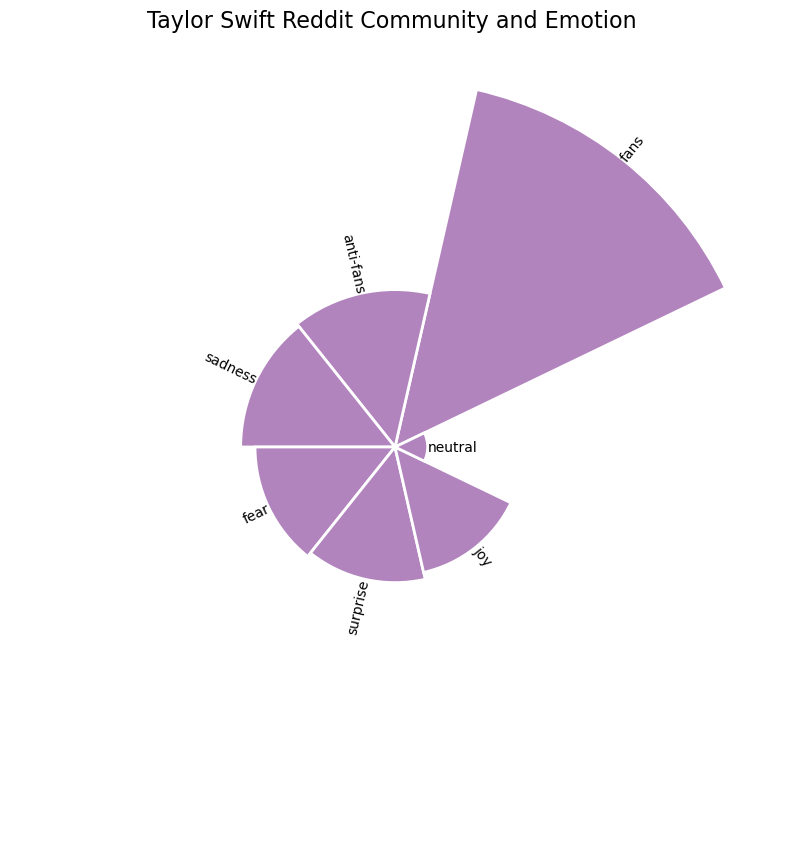

In [155]:
# Set figure size
plt.figure(figsize=(10, 10))

# Plot polar axis
ax = plt.subplot(111, polar=True)

# Remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 100
lowerLimit = 30

# Compute max and min in the dataset
max = merged_df['count'].max()

slope = (max - lowerLimit) / max
heights = slope * merged_df['count'] + lowerLimit

# Compute the width of each bar. In total, we have 2*Pi = 360°
width = 2 * np.pi / len(merged_df.index)

# Compute the angle each bar is centered on
indexes = list(range(1, len(merged_df.index) + 1))
angles = [element * width for element in indexes]

# Draw bars
bars = ax.bar(
    x=angles,
    height=heights,
    width=width,
    bottom=lowerLimit,
    linewidth=2,
    edgecolor="white",
    color="#b284be",
)

# Add label padding
labelPadding = 4

# Add labels
for bar, angle, height, label in zip(bars, angles, heights, merged_df['category']):
    # Labels are rotated. Rotation must be specified in degrees
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi / 2 and angle < 3 * np.pi / 2:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"

    # Finally, add the labels
    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() + labelPadding,
        s=label,
        ha=alignment,
        va='center',
        rotation=rotation,
        rotation_mode="anchor"
    )
# Add a title to the circular barplot
plt.title('Taylor Swift Reddit Community and Emotion ', fontsize=16)

# Save the figure
plt.savefig('Users/cs2046/fall-2023-reddit-project-team-21/plots/reddit_community_emotion_chart.jpeg', bbox_inches='tight')

# Show the circular barplot
plt.show()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 141, Finished, Available)

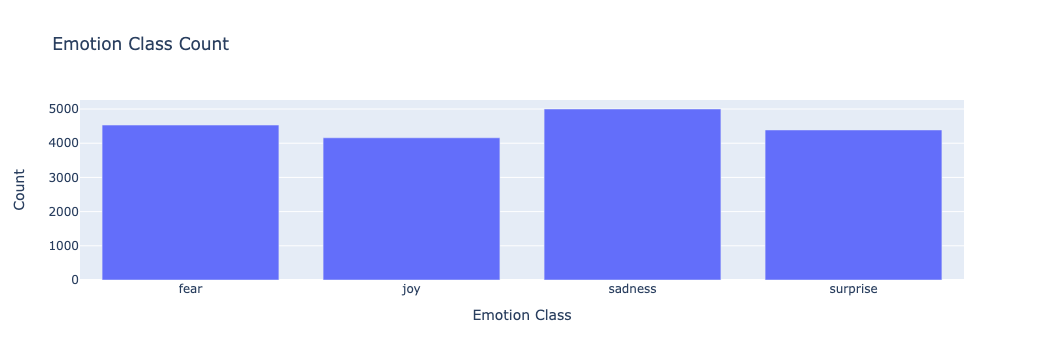

In [156]:
# Create the bar chart
fig = px.bar(
    emotion_grouped_df,
    x='emotion_class',
    y='count',
    title='Emotion Class Count',
    labels={'emotion_class': 'Emotion Class', 'count': 'Count'},
)

# Save the plot
#fig.write_html("Users/rs2190/Project/fall-2023-reddit-project-team-21/plots/emotion_class_count.html")

# Show the chart
fig.show()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 142, Finished, Available)

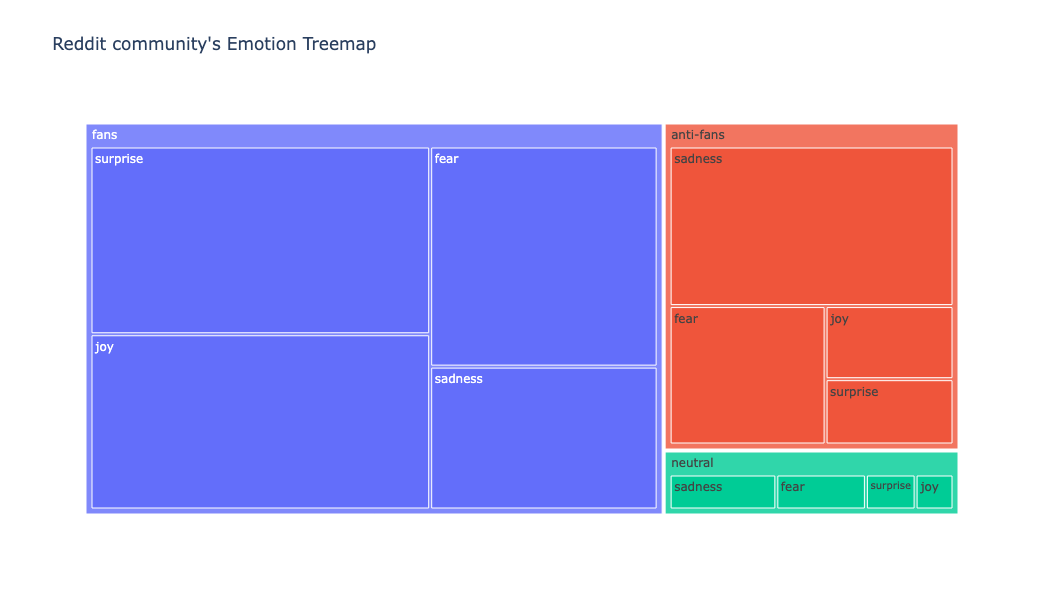

In [157]:
# Create the treemap chart
fig = px.treemap(
    df_pandas,
    path=['reddit_community', 'emotion_class'],
    title='Reddit community\'s Emotion Treemap',
    width=800,
    height=600
)

# Save the plot
#fig.write_html("Users/rs2190/Project/fall-2023-reddit-project-team-21/plots/reddit_community_emotion_treemap.html")

# Show the chart
fig.show()

## Using flairs dataset

In [158]:
flairs_blob_path = 'azureml://datastores/workspaceblobstore/paths/cleanedFlairs/cleanSubset/part-*.snappy.parquet'
flairs_cleaned = spark.read.parquet(flairs_blob_path, header=True)

flairs_count = flairs_cleaned.count()
print(f'Number of rows in flairs dataset: {flairs_count}')
print(f'Number of columns in flairs dataset: {len(flairs_cleaned.columns)}')

# Use the printSchema method to print the Spark DataFrame schema
flairs_cleaned.printSchema()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 143, Finished, Available)

Number of rows in flairs dataset: 7603
Number of columns in flairs dataset: 17
root
 |-- author: string (nullable = true)
 |-- author_flair_css_class: string (nullable = true)
 |-- body: string (nullable = true)
 |-- can_gild: boolean (nullable = true)
 |-- controversiality: long (nullable = true)
 |-- created_utc: timestamp (nullable = true)
 |-- edited: string (nullable = true)
 |-- gilded: long (nullable = true)
 |-- id: string (nullable = true)
 |-- is_submitter: boolean (nullable = true)
 |-- link_id: string (nullable = true)
 |-- parent_id: string (nullable = true)
 |-- permalink: string (nullable = true)
 |-- score: long (nullable = true)
 |-- stickied: boolean (nullable = true)
 |-- subreddit: string (nullable = true)
 |-- subreddit_id: string (nullable = true)



In [159]:
# display a subset of columns
flairs_cleaned.select("subreddit", "author", "author_flair_css_class", "body").show()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 144, Finished, Available)

+-----------+--------------------+----------------------+--------------------+
|  subreddit|              author|author_flair_css_class|                body|
+-----------+--------------------+----------------------+--------------------+
|TaylorSwift|        parkavetheme|                  1989|not sure what ven...|
|TaylorSwift|             Mew_Mix|              folklore|I am STILL paused...|
|TaylorSwift|         briannabear|            reputation|       Arlington????|
|TaylorSwift|          saraek1980|              evermore|I'm in line for b...|
|TaylorSwift|          toodleoo57|             midnights|TM has a monopoly...|
|TaylorSwift| colbyisfunatparties|             midnights|mine has been fro...|
|TaylorSwift|          VforVegans|            reputation|Still waiting. We...|
|TaylorSwift|     GimmeThemBabies|              evermore|Honestly resale c...|
|TaylorSwift|Mammoth_Fortune_6457|            fearlesstv|      us peasants 😭|
|TaylorSwift|        atworldsendx|            reputat

In [160]:
# Filter out the empty comments
flairs_cleaned = flairs_cleaned.withColumn("length_body",F.length(flairs_cleaned.body))
flairs_cleaned = flairs_cleaned.filter(flairs_cleaned['length_body'] > 0)

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 145, Finished, Available)

In [161]:
# Clean the comments using the Spark NLP Pipeline created earlier
cleaned_flairs = cleaning_pipeline_model.transform(flairs_cleaned)
cleaned_flairs.printSchema()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 146, Finished, Available)

root
 |-- author: string (nullable = true)
 |-- author_flair_css_class: string (nullable = true)
 |-- body: string (nullable = true)
 |-- can_gild: boolean (nullable = true)
 |-- controversiality: long (nullable = true)
 |-- created_utc: timestamp (nullable = true)
 |-- edited: string (nullable = true)
 |-- gilded: long (nullable = true)
 |-- id: string (nullable = true)
 |-- is_submitter: boolean (nullable = true)
 |-- link_id: string (nullable = true)
 |-- parent_id: string (nullable = true)
 |-- permalink: string (nullable = true)
 |-- score: long (nullable = true)
 |-- stickied: boolean (nullable = true)
 |-- subreddit: string (nullable = true)
 |-- subreddit_id: string (nullable = true)
 |-- length_body: integer (nullable = true)
 |-- document: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- annotatorType: string (nullable = true)
 |    |    |-- begin: integer (nullable = false)
 |    |    |-- end: integer (nullable = false)
 |    |    |-- re

In [162]:
cleaned_flairs = cleaned_flairs.withColumn("text", F.concat_ws(" ", "finished_clean_lemma"))
cleaned_flairs.select(cleaned_flairs.text).show(5)

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 147, Finished, Available)

+--------------------+
|                text|
+--------------------+
|sure venue get si...|
|still pause finge...|
|           arlington|
|     im line slow af|
|    tm monopoly want|
+--------------------+
only showing top 5 rows



In [ ]:
cleaned_flairs.write.parquet('azureml://datastores/workspaceblobstore/paths/flairsCleaned')

StatementMeta(, , , Waiting, )

## Read cleaned flairs data

In [163]:
clean_flairs_blob_path = 'azureml://datastores/workspaceblobstore/paths/flairsCleaned/part-*.snappy.parquet'
cleaned_flairs = spark.read.parquet(clean_flairs_blob_path, header=True)

clean_flairs_count = cleaned_flairs.count()
print(f'Number of rows in clean flairs dataset: {clean_flairs_count}')
print(f'Number of columns in clean flairs dataset: {len(cleaned_flairs.columns)}')

cleaned_flairs.printSchema()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 148, Finished, Available)

Number of rows in clean flairs dataset: 7603
Number of columns in clean flairs dataset: 25
root
 |-- author: string (nullable = true)
 |-- author_flair_css_class: string (nullable = true)
 |-- body: string (nullable = true)
 |-- can_gild: boolean (nullable = true)
 |-- controversiality: long (nullable = true)
 |-- created_utc: timestamp (nullable = true)
 |-- edited: string (nullable = true)
 |-- gilded: long (nullable = true)
 |-- id: string (nullable = true)
 |-- is_submitter: boolean (nullable = true)
 |-- link_id: string (nullable = true)
 |-- parent_id: string (nullable = true)
 |-- permalink: string (nullable = true)
 |-- score: long (nullable = true)
 |-- stickied: boolean (nullable = true)
 |-- subreddit: string (nullable = true)
 |-- subreddit_id: string (nullable = true)
 |-- length_body: integer (nullable = true)
 |-- document: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- annotatorType: string (nullable = true)
 |    |    |-- begin: 

In [164]:
# display a subset of columns
cleaned_flairs.select("subreddit", "author", "author_flair_css_class", "text").show()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 149, Finished, Available)

+-----------+--------------------+----------------------+--------------------+
|  subreddit|              author|author_flair_css_class|                text|
+-----------+--------------------+----------------------+--------------------+
|TaylorSwift|        parkavetheme|                  1989|sure venue get si...|
|TaylorSwift|             Mew_Mix|              folklore|still pause finge...|
|TaylorSwift|         briannabear|            reputation|           arlington|
|TaylorSwift|          saraek1980|              evermore|     im line slow af|
|TaylorSwift|          toodleoo57|             midnights|    tm monopoly want|
|TaylorSwift| colbyisfunatparties|             midnights|freeze since est ...|
|TaylorSwift|          VforVegans|            reputation|still wait absolu...|
|TaylorSwift|     GimmeThemBabies|              evermore|honestly resale c...|
|TaylorSwift|Mammoth_Fortune_6457|            fearlesstv|             peasant|
|TaylorSwift|        atworldsendx|            reputa

We see that the column `author_flair_css_class` corresponds to different albums. So lets rename it and group by album to get the overall concatenated comments of the reddit community.

In [165]:
# Group by 'author_flair_css_class' and aggregate the text values
comm_grouped_df = cleaned_flairs.groupBy("author_flair_css_class").agg(
    F.concat_ws(" ", F.collect_list("text")).alias("text")
)

# Show the resulting DataFrame
comm_grouped_df.show()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 150, Finished, Available)

+----------------------+--------------------+
|author_flair_css_class|                text|
+----------------------+--------------------+
|                 redtv|orange bar right ...|
|             midnights|tm monopoly want ...|
|          fearless2021|ohhhhh yes ive pa...|
|              fearless|make feel much we...|
|           taylorswift|queue denver peop...|
|            reputation|arlington still w...|
|              evermore|im line slow af h...|
|                 lover|city say calculat...|
|                   red|someone explain p...|
|                  1989|sure venue get si...|
|              speaknow|want know well oh...|
|            fearlesstv|peasant use vivid...|
|              folklore|still pause finge...|
|                1989tv|still queue chug ...|
|                      |f apt username ah...|
+----------------------+--------------------+



Some of the flairs don't make sense. We can see that there's fearless2021 and fearless which might correspond to the same album.

However, we can't neglect the fact that Taylor Swift released her Taylor's version (TV) of her albums recently. Given that the comments dataset was crawled before Taylor's version, it is quite possible that the fans on reddit were already discussing about it. Hence we can see a few flairs such redtv, fearlesstv and 1989tv.

The discussion regarding these flairs might certainly not be related to the emotion of the song or the album but certainly towards fans expressing their views regarding the Megastar releasing these later on given the scandal.

Lets take a deep dive into this.

In [166]:
# Conditionally update the 'text' column
comm_grouped_df = comm_grouped_df.withColumn(
    "text",
    F.when(
        (F.col("author_flair_css_class") == "fearless2021") | (F.col("author_flair_css_class") == "fearless"),
        F.concat_ws(" ", F.col("text"), F.lit(" "))  # Add a space between concatenated texts
    ).otherwise(F.col("text"))
).filter(F.col("author_flair_css_class") != "fearless2021")  # Drop the rows where 'album_name' is 'fearless2021'

# Show the resulting DataFrame
comm_grouped_df.show()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 151, Finished, Available)

+----------------------+--------------------+
|author_flair_css_class|                text|
+----------------------+--------------------+
|                 redtv|omg literally get...|
|             midnights|one fun something...|
|              fearless|frustrate happen ...|
|           taylorswift|want believe sooo...|
|            reputation|listen santa inte...|
|              evermore|think fine attend...|
|                 lover|definitely cover ...|
|                   red|dont know misogyn...|
|                  1989|would real twist ...|
|              speaknow|ooo like god cat ...|
|            fearlesstv|top big stream da...|
|              folklore|wild crazy fruste...|
|                1989tv|cant believe have...|
|                      |long live speak e...|
+----------------------+--------------------+



## Generating sentiment of combined comments

We will use spark nlp to generate the sentiment of the combined comments. The sentiment of public towards the albums will later be compared for to Taylor Swift's sentiment of her albums.

In [167]:
# Fit the pipeline
# sent_empty_df = spark.createDataFrame([['']]).toDF("text")
# sent_pipeline_model = sentiment_pipeline_model.fit(sent_empty_df)

# Transform the DataFrame to add sentiment predictions
reddit_sent_result = sentiment_pipeline_model.transform(comm_grouped_df)

# Print the schema of the resulting dataframe
reddit_sent_result.printSchema()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 152, Finished, Available)

root
 |-- author_flair_css_class: string (nullable = true)
 |-- text: string (nullable = false)
 |-- document: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- annotatorType: string (nullable = true)
 |    |    |-- begin: integer (nullable = false)
 |    |    |-- end: integer (nullable = false)
 |    |    |-- result: string (nullable = true)
 |    |    |-- metadata: map (nullable = true)
 |    |    |    |-- key: string
 |    |    |    |-- value: string (valueContainsNull = true)
 |    |    |-- embeddings: array (nullable = true)
 |    |    |    |-- element: float (containsNull = false)
 |-- sentence_embeddings: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- annotatorType: string (nullable = true)
 |    |    |-- begin: integer (nullable = false)
 |    |    |-- end: integer (nullable = false)
 |    |    |-- result: string (nullable = true)
 |    |    |-- metadata: map (nullable = true)
 |    |    |    |-- key: 

In [168]:
reddit_sentiment_result = reddit_sent_result.select(F.expr("document.result").alias("document"),\
                            F.expr("sentiment.result").alias("sentiment"),\
                            F.expr("sentiment2.result").alias("emotion"),\
                            F.expr("author_flair_css_class").alias("author_flair_css_class"),\
                                    ).select(\
                                    "author_flair_css_class",\
    F.expr("document[0]").alias("document"),\
    F.expr("sentiment[0]").alias("sentiment"),\
    F.expr("emotion[0]").alias("emotion_class"))
                    
reddit_sentiment_result.printSchema()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 153, Finished, Available)

root
 |-- author_flair_css_class: string (nullable = true)
 |-- document: string (nullable = true)
 |-- sentiment: string (nullable = true)
 |-- emotion_class: string (nullable = true)



In [169]:
reddit_sentiment_result.show()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 154, Finished, Available)

+----------------------+--------------------+---------+-------------+
|author_flair_css_class|            document|sentiment|emotion_class|
+----------------------+--------------------+---------+-------------+
|                 redtv|orange bar right ...| negative|         fear|
|             midnights|tm monopoly want ...| negative|          joy|
|              fearless|make feel much we...| negative|          joy|
|           taylorswift|queue denver peop...| negative|         fear|
|            reputation|arlington still w...| negative|         fear|
|              evermore|im line slow af h...| positive|          joy|
|                 lover|city say calculat...|  neutral|          joy|
|                   red|someone explain p...| negative|          joy|
|                  1989|sure venue get si...| negative|      sadness|
|              speaknow|want know well oh...| negative|         fear|
|            fearlesstv|peasant use vivid...| negative|      sadness|
|              folkl

In [170]:
# Convert to pandas dataframe
pd_sent_result = reddit_sentiment_result.toPandas()

# Define sentiment mapping
sentiment_mapping = {
    'positive': 'fans',
    'negative': 'anti-fans',
    'neutral': 'neutral'
}

pd_sent_result['reddit_community'] = pd_sent_result['sentiment'].map(sentiment_mapping).fillna('unknown')

# Drop the original sentiment column
pd_sent_result = pd_sent_result.drop('sentiment', axis=1)

pd_sent_result = pd_sent_result[['author_flair_css_class', 'document', 'reddit_community', 'emotion_class']]

# Convert Pandas DataFrame to Spark DataFrame
reddit_sentiment_result = spark.createDataFrame(pd_sent_result)

# Show the Spark DataFrame
reddit_sentiment_result.show()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 155, Finished, Available)

+----------------------+--------------------+----------------+-------------+
|author_flair_css_class|            document|reddit_community|emotion_class|
+----------------------+--------------------+----------------+-------------+
|                 redtv|omg literally get...|       anti-fans|         fear|
|             midnights|one fun something...|       anti-fans|          joy|
|              fearless|frustrate happen ...|       anti-fans|          joy|
|           taylorswift|want believe sooo...|       anti-fans|         fear|
|            reputation|listen santa inte...|       anti-fans|         fear|
|              evermore|think fine attend...|            fans|          joy|
|                 lover|definitely cover ...|         neutral|          joy|
|                   red|dont know misogyn...|       anti-fans|          joy|
|                  1989|would real twist ...|       anti-fans|      sadness|
|              speaknow|ooo like god cat ...|       anti-fans|         fear|

In [171]:
filtered_pd_sent = pd_sent_result[['author_flair_css_class', 'reddit_community', 'emotion_class']]
filtered_pd_sent = filtered_pd_sent[filtered_pd_sent['author_flair_css_class'] != '']
filtered_pd_sent.rename(columns={'author_flair_css_class': 'album_name'}, inplace=True)
#filtered_pd_sent.to_csv('Users/rs2190/Project/fall-2023-reddit-project-team-21/data/csv/album_emotion_table.csv', index=False)
filtered_pd_sent

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 156, Finished, Available)

,album_name,reddit_community,emotion_class
0,redtv,anti-fans,fear
1,midnights,anti-fans,joy
2,fearless,anti-fans,joy
3,taylorswift,anti-fans,fear
4,reputation,anti-fans,fear
5,evermore,fans,joy
6,lover,neutral,joy
7,red,anti-fans,joy
8,1989,anti-fans,sadness
9,speaknow,anti-fans,fear


## External Dataset

We will now import the external dataset. For more information about this dataset, you can check the `Data Collection` section of website.

This dataset was cleaned and saved into a csv for accessibility. We will import the clean data.

In [190]:
# Load the data
data = pd.read_csv("Users/rs2190/Project/fall-2023-reddit-project-team-21/data/csv/clean_spotify_data.csv")
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 175, Finished, Available)

,album_id,track_id,track_name,album_name,album_release_date,album_release_year,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,explicit,key_name,mode_name,key_mode
0,1o59UpKw81iHR0HPiSkJR0,4WUepByoeqcedHoYhSNHRt,Welcome To New York (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,2023,0.757,0.610,7,-4.840,...,0.000037,0.3670,0.685,116.998,4,212600,False,G,major,G major
1,1o59UpKw81iHR0HPiSkJR0,0108kcWLnn2HlH2kedi1gn,Blank Space (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,2023,0.733,0.733,0,-5.376,...,0.000000,0.1680,0.701,96.057,4,231833,False,C,major,C major
2,1o59UpKw81iHR0HPiSkJR0,3Vpk1hfMAQme8VJ0SNRSkd,Style (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,2023,0.511,0.822,11,-4.785,...,0.019700,0.0899,0.305,94.868,4,231000,False,B,minor,B minor
3,1o59UpKw81iHR0HPiSkJR0,1OcSfkeCg9hRC2sFKB4IMJ,Out Of The Woods (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,2023,0.545,0.885,0,-5.968,...,0.000056,0.3850,0.206,92.021,4,235800,False,C,major,C major
4,1o59UpKw81iHR0HPiSkJR0,2k0ZEeAqzvYMcx9Qt5aClQ,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,2023,0.588,0.721,0,-5.579,...,0.000000,0.1310,0.520,96.997,4,193289,False,C,major,C major


In [192]:
# Function to map energy and valence to emotion categories and names
def map_emotion(energy, valence):
    if energy >= 0.5 and valence >= 0.5:
        return "joy"
    elif energy < 0.5 and valence >= 0.5:
        return "calm"
    elif energy >= 0.5 and valence < 0.5:
        return "fear"
    else:
        return "sadness"

# Add the 'emotion' column to the data frame
data['emotion'] = data.apply(lambda row: map_emotion(row['energy'], row['valence']), axis=1)

# Calculate the count of each emotion for each album
emotion_counts = data.groupby(['album_name', 'emotion']).size().reset_index(name='count')

result_df = emotion_counts.loc[emotion_counts.groupby('album_name')['count'].idxmax()]

#result_df = emotion_counts[idx].drop('count', axis=1).reset_index()

result_df.drop(columns=['count'], inplace=True)

# Display the Spark DataFrame
result_df

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 177, Finished, Available)

In [200]:
# Define album mapping
album_mapping = {
    '1989': ['1989', '1989 (Deluxe Edition)'],
    "1989tv": ["1989 (Taylor's Version)", "1989 (Taylor's Version) [Deluxe]"],
    "fearless": ["Fearless", "Fearless Platinum Edition"],
    "fearlesstv": ["Fearless (Taylor's Version)"],
    "midnights": ["Midnights", "Midnights (3am Edition)", "Midnights (The Til Dawn Edition)"],
    "red": ["Red", "Red (Deluxe Edition)"],
    "redtv": ["Red (Taylor's Version)"],
    "speaknow": ["Speak Now", "Speak Now (Deluxe Edition)", "Speak Now World Tour Live"],
    "speaknowtv": ["Speak Now (Taylor's Version)"],
    "taylorswift": ["Taylor Swift"],
    "evermore": ['evermore', 'evermore (deluxe version)'],
    "folklore": ['folklore', 'folklore (deluxe version)', 'folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]'],
    "reputation": ['reputation', 'reputation Stadium Tour Surprise Song Playlist']
}
 

# Map album names
result_df['mapped_album'] = result_df['album_name'].apply(lambda x: next((key for key, values in album_mapping.items() if x in values), x))

# Group by mapped album names and find the emotion based on the max count
df = result_df.groupby('mapped_album')['emotion'].agg(lambda x: x.value_counts().idxmax()).reset_index()

# Rename columns
df.columns = ['album_name', 'emotion_spotify']
df['album_name'] = df['album_name'].str.lower()

# Convert Pandas DataFrame to Spark DataFrame
spark_spotify_df = spark.createDataFrame(df)

# Show the Spark DataFrame
spark_spotify_df.show()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 185, Finished, Available)

+--------------------+---------------+
|          album_name|emotion_spotify|
+--------------------+---------------+
|                1989|            joy|
|              1989tv|           fear|
|live from clear c...|           fear|
|               lover|            joy|
|            evermore|        sadness|
|            fearless|           fear|
|          fearlesstv|           fear|
|            folklore|        sadness|
|           midnights|        sadness|
|                 red|            joy|
|               redtv|           fear|
|          reputation|           fear|
|            speaknow|           fear|
|          speaknowtv|           fear|
|         taylorswift|           fear|
+--------------------+---------------+



In [201]:
pd_spotify_df = spark_spotify_df.toPandas()
pd_spotify_df.to_csv('Users/cs2046/fall-2023-reddit-project-team-21/data/csv/album_emotion_spotify_table.csv', index=False)

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 186, Finished, Available)

## Sentiment comparison of reddit community and Spotify

In [202]:
reddit_sent_result = reddit_sentiment_result.select('author_flair_css_class', 'reddit_community', 'emotion_class') \
    .withColumnRenamed('author_flair_css_class', 'album_name')\
    .withColumnRenamed('emotion_class', 'emotion_reddit')

# Show the resulting DataFrame
reddit_sent_result.show()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 187, Finished, Available)

+-----------+----------------+--------------+
| album_name|reddit_community|emotion_reddit|
+-----------+----------------+--------------+
|      redtv|       anti-fans|          fear|
|  midnights|       anti-fans|           joy|
|   fearless|       anti-fans|           joy|
|taylorswift|       anti-fans|          fear|
| reputation|       anti-fans|          fear|
|   evermore|            fans|           joy|
|      lover|         neutral|           joy|
|        red|       anti-fans|           joy|
|       1989|       anti-fans|       sadness|
|   speaknow|       anti-fans|          fear|
| fearlesstv|       anti-fans|       sadness|
|   folklore|       anti-fans|          fear|
|     1989tv|       anti-fans|           joy|
|           |            fans|           joy|
+-----------+----------------+--------------+



In [203]:
# Join the two DataFrames on 'album_name'
joined_df = reddit_sent_result.join(spark_spotify_df, 'album_name', 'left')

# Show the resulting DataFrame
joined_df.show()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 188, Finished, Available)

+-----------+----------------+--------------+---------------+
| album_name|reddit_community|emotion_reddit|emotion_spotify|
+-----------+----------------+--------------+---------------+
|      redtv|       anti-fans|          fear|           fear|
|  midnights|       anti-fans|           joy|        sadness|
| reputation|       anti-fans|          fear|           fear|
|   evermore|            fans|           joy|        sadness|
|       1989|       anti-fans|       sadness|            joy|
|   speaknow|       anti-fans|          fear|           fear|
|     1989tv|       anti-fans|           joy|           fear|
|           |            fans|           joy|           null|
|   fearless|       anti-fans|           joy|           fear|
|taylorswift|       anti-fans|          fear|           fear|
|      lover|         neutral|           joy|            joy|
|        red|       anti-fans|           joy|            joy|
| fearlesstv|       anti-fans|       sadness|           fear|
|   folk

In [204]:
# Convert Spark DataFrame to Pandas DataFrame
joined_df_pandas = joined_df.toPandas()

# Filter the dataframe
joined_df_pandas = joined_df_pandas[joined_df_pandas['album_name'] != '']
joined_df_pandas

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 189, Finished, Available)

,album_name,reddit_community,emotion_reddit,emotion_spotify
0,redtv,anti-fans,fear,fear
1,midnights,anti-fans,joy,sadness
2,reputation,anti-fans,fear,fear
3,evermore,fans,joy,sadness
4,1989,anti-fans,sadness,joy
5,speaknow,anti-fans,fear,fear
6,1989tv,anti-fans,joy,fear
8,fearless,anti-fans,joy,fear
9,taylorswift,anti-fans,fear,fear
10,lover,neutral,joy,joy


StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 190, Finished, Available)

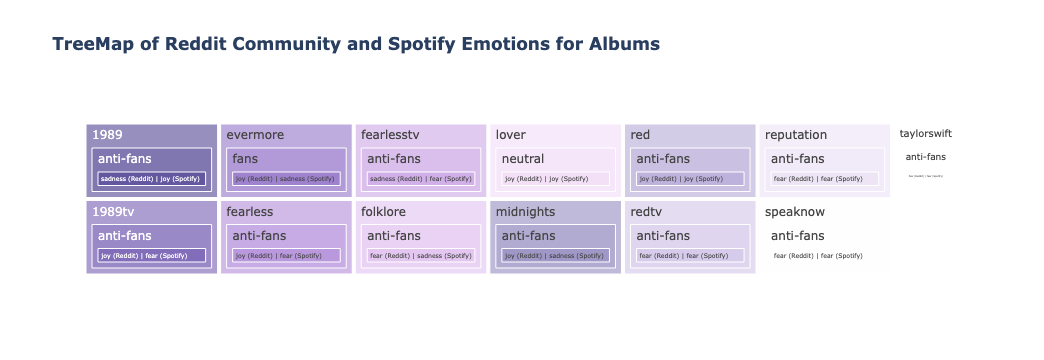

In [205]:
# Create a new column for combined emotions with labels
joined_df_pandas['emotions_combined'] = (
    joined_df_pandas['emotion_reddit'] + ' (Reddit) | ' + joined_df_pandas['emotion_spotify'] + ' (Spotify)'
)

# Plot TreeMap using Plotly Express with different color schemes
fig = px.treemap(
    joined_df_pandas,
    path=['album_name', 'reddit_community', 'emotions_combined'],
    values=[1] * len(joined_df_pandas),  # Using a constant value for simplicity
    title='<b>TreeMap of Reddit Community and Spotify Emotions for Albums</b>',
    hover_data={'album_name': True, 'reddit_community': True, 'emotions_combined': True},
    color_discrete_sequence=px.colors.sequential.Purp_r 
)

# Save the plot
fig.write_html("Users/cs2046/fall-2023-reddit-project-team-21/plots/treemap_reddit_spotify.html")

# Show the plot
fig.show()

The Treemap visualization, (Figure 15) provides a comprehensive overview of Taylor Swift’s albums, considering both the sentiments expressed within Reddit comments (reddit emotion based on comments) and the emotional tone derived from the songs on Spotify (spotify emotion based on songs ).

Firstly, it’s evident that ‘anti-fans’ are prominently represented in the majority of the albums, particularly associated with emotions such as ‘fear,’ ‘sadness,’ and ‘joy.’ This suggests that anti-fans actively engage in discussions about Taylor Swift’s music, encompassing a wide range of emotional responses.

The album ‘Lover’ stands out with ‘neutral’ sentiment from the Reddit community, indicating a balanced or indifferent response from fans. However, when considering Spotify data, it aligns with a ‘joyful’ emotion, reflecting a more positive emotional tone conveyed by the songs in this album. This intriguing contrast highlights the potential for differing emotional interpretations of the same content.

On the other hand, ‘fearlesstv’ and ‘folklore’ albums demonstrate an interesting combination of emotions. While anti-fans associate ‘fear’ with these albums in Reddit comments, Spotify suggests a contrasting ‘sadness’ sentiment. This disparity in emotional perception could be attributed to varying interpretations of the albums’ themes, lyrics, or musical styles.

## Cyberbullying Classifier
One of the most prevalent issues facing online forums, especially for celebrities, is cyberbullying. This is further exacerbated for female celebrities - who often times have to deal with sexist remarks. Therefore, given the data we have obtained from reddit from r/TaylorSwift, we wanted to analyze the level of cyberbullying present within the subreddit to see if there is a large amount of cyberbullying present when talking about Taylor or her music.

A cyberbullying classifier pipeline was built with the help of code from John Snow Labs (referenced [here](https://sparknlp.org/2021/01/09/classifierdl_use_cyberbullying_en.html).) 

#### Build the Classifier Pipeline

In [179]:
# Reference: https://sparknlp.org/2021/01/09/classifierdl_use_cyberbullying_en.html
cyber_bullying_document_assembler = DocumentAssembler()\
.setInputCol("body")\
.setOutputCol("document")

cyber_bullying_use = UniversalSentenceEncoder.pretrained('tfhub_use', lang="en") \
.setInputCols(["document"])\
.setOutputCol("sentence_embeddings")

cyber_bullying_document_classifier = ClassifierDLModel.pretrained('classifierdl_use_cyberbullying') \
.setInputCols(["sentence_embeddings"]) \
.setOutputCol("cyberbully_class")

cyber_bullying_pipeline = Pipeline(stages=[cyber_bullying_document_assembler, cyber_bullying_use, cyber_bullying_document_classifier])

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 164, Finished, Available)

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
classifierdl_use_cyberbullying download started this may take some time.
Approximate size to download 21.3 MB
[OK!]


#### Apply the pipeline to the data

In [181]:
cyber_bullying_results = cyber_bullying_pipeline.fit(clean_comments).transform(clean_comments)
cyber_bullying_table = cyber_bullying_results.select(F.explode(F.arrays_zip(cyber_bullying_results.document.result, 
                                     cyber_bullying_results.cyberbully_class.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("document"),
              F.expr("cols['1']").alias("cyberbully_class"))

cyber_bullying_table.show()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 166, Finished, Available)

+--------------------+----------------+
|            document|cyberbully_class|
+--------------------+----------------+
|It's about trauma...|         neutral|
|Tickets are alrea...|         neutral|
|Mine is doing the...|         neutral|
|I signed up with ...|         neutral|
|Lol this presale ...|         neutral|
|An issue all Amer...|         neutral|
|    browser for sure|         neutral|
|Alright guys, her...|         neutral|
|How do we view so...|         neutral|
|I've been compili...|         neutral|
|That exact thing ...|         neutral|
|Tampa is moving a...|         neutral|
|                 Yes|         neutral|
|    It’s moving now!|         neutral|
|Isn't she too old...|          sexism|
|I NEVER buy from ...|         neutral|
|ATL 4/28 too, got...|         neutral|
|4/30 ATL still no...|         neutral|
|Yep :/ Still paus...|         neutral|
|6/2 Chicago and p...|         neutral|
+--------------------+----------------+
only showing top 20 rows



In [182]:
cyber_bullying_table.count()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 167, Finished, Available)

18079

In [183]:
pd_cyber_bullying = cyber_bullying_table.toPandas()
pd_cyber_bullying.to_csv("Users/rs2190/Project/fall-2023-reddit-project-team-21/data/csv/cyber_bullying_results.csv", index=False)
pd_cyber_bullying

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 168, Finished, Available)

,document,cyberbully_class
0,It's about trauma it describes it in the form of religious trauma... The fact that she still regrets him after this long just shows how deep the wounds were,neutral
1,Tickets are already on Stubhub for thousands. $$$$ This sucks.,neutral
2,Mine is doing the same thing; others have said just to keep trying and it eventually might work,neutral
3,I signed up with two emails. Only one of them got a pre-sale code.,neutral
4,Lol this presale is prematurity aging us all,neutral
...,...,...
18074,This album is so stacked.,neutral
18075,uhmmmm… this literally might be my fav fan art I’ve ever seen tbh,neutral
18076,"Okay yeah I admit my wording was tactless, didn't wanna degrade florists but I stand to my opinion regarding Taylor tho",neutral
18077,Source?,neutral


### Visualization and Analysis

In [184]:
from pyspark.sql.types import StringType

# Group by cyberbully_class and count each sentiment instance
cyberbully_counts = cyber_bullying_results.select(F.explode(F.arrays_zip(cyber_bullying_results.document.result, 
                                     cyber_bullying_results.cyberbully_class.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("document"),
              F.expr("cols['1']").alias("cyberbully_class")).groupBy("cyberbully_class").count().sort("count")
cyberbully_counts.show()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 169, Finished, Available)

+----------------+-----+
|cyberbully_class|count|
+----------------+-----+
|          racism|   31|
|          sexism| 1932|
|         neutral|16116|
+----------------+-----+



In [185]:
pd_cyberbully_counts = cyberbully_counts.toPandas()
pd_cyberbully_counts

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 170, Finished, Available)

,cyberbully_class,count
0,racism,31
1,sexism,1932
2,neutral,16116


StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 171, Finished, Available)

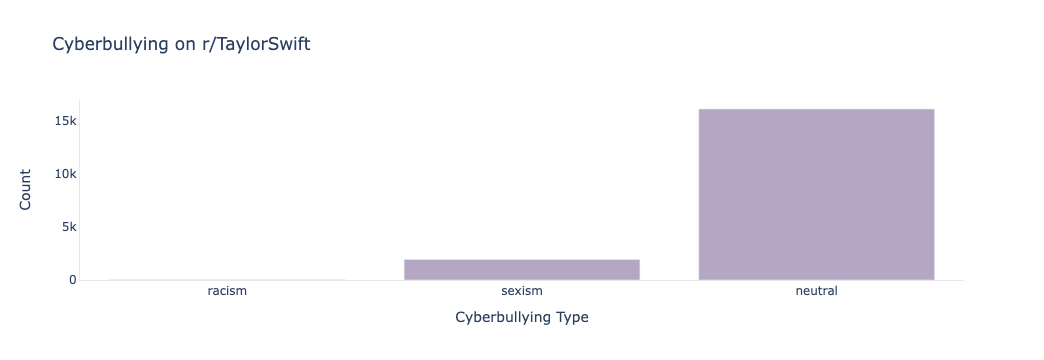

In [186]:
# Set up the bar chart
fig = px.bar(
    pd_cyberbully_counts, 
    x='cyberbully_class',
    y='count',
    title="Cyberbullying on r/TaylorSwift",
    labels={'cyberbully_class': "Cyberbullying Type", 'count': "Count"},
    template="plotly",
    color_discrete_sequence=['#b5a6c4'] * len(pd_cyberbully_counts)  # Set color to red
)

# Set the background color to white
fig.update_layout(plot_bgcolor='white')

# Add axis lines
fig.update_xaxes(showline=True, linewidth=1, linecolor='#E8E8E8')
fig.update_yaxes(showline=True, linewidth=1, linecolor='#E8E8E8')

# Save the figure
#fig.write_html("Users/rs2190/Project/fall-2023-reddit-project-team-21/plots/cyber_bully_plot.html")

# Show the bar chart
fig.show()

StatementMeta(bf55215d-1911-452e-b845-6499151102c4, 60, 172, Finished, Available)

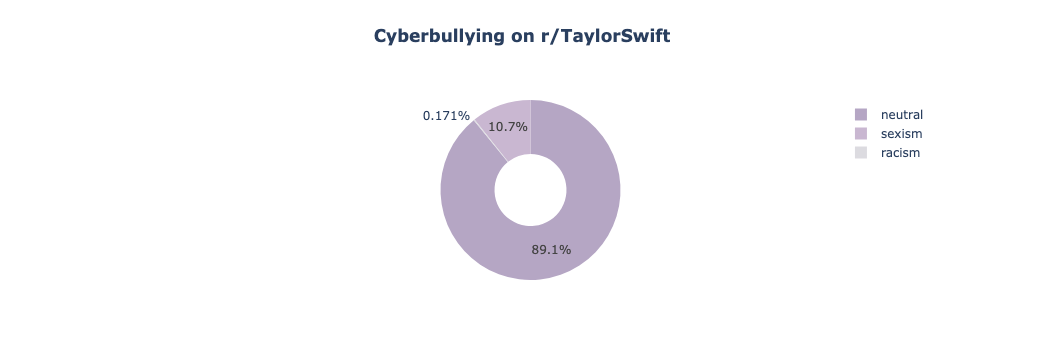

In [187]:
# Create a donut plot
fig = px.pie(
    pd_cyberbully_counts,
    names='cyberbully_class',
    values='count',
    title="<b>Cyberbullying on r/TaylorSwift</b>",
    hole=0.4,  # Adjust the hole size to create the donut effect
    color_discrete_sequence=['#b5a6c4', '#c9b7d1', '#dcdbe0']  # Set custom colors
)

# Align the title in the center
fig.update_layout(
    title_x=0.5,  # Center the title horizontally
    title_y=0.9,  # Center the title vertically
    title_xanchor='center',
    title_yanchor='middle'
)

# Set the background color to white
fig.update_layout(plot_bgcolor='white')

# Save the figure (optional)
fig.write_html("Users/cs2046/fall-2023-reddit-project-team-21/plots/cyber_bully_donut_plot.html")

# Show the donut plot
fig.show()

Around 89% of the posts in this subset are classified as "neutral", indicating that there was no cyberbullying sentiment detected within these posts. To a level, this is somewhat surprising given several of the posts within this subset are from when Taylor Swift's 2023 Eras Tour tickets when on sale - leading to Ticketmaster crashing. The level of interest surrounding this tour, in tandem with the relative anonymity provided by the internet, seemed like it would unfortunately be a perfect storm for unsavory comments toward Taylor. Fortunately, this did not seem to be the trend overall as only a small portion (~11%) of posts were flagged as containing sexist remarks.